In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from metrics_scripts.metrics_utils import *

import pandas as pd
from osgeo import ogr, gdal, osr

import cPickle as pickle

import itertools

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

from shapely.geometry import shape, Point, Polygon, MultiLineString, MultiPoint, MultiPolygon, LineString

from sklearn.decomposition import PCA

In [3]:
islands, fields = load_shapefile('ganges_metrics/metrics_results/islands_properties.shp', parameters='all')

fields = {k:np.array(v) for k,v in fields.iteritems()}




classify_data = pd.DataFrame()




classify_data['area'] = np.log10(fields['p_area'] /
                                 fields['p_area'].min())
                                 
classify_data['avg_width'] = np.log10(fields['avg_width'] /
                                      fields['avg_width'].min())
                                      
classify_data['max_width'] = np.log10(fields['max_width'] /
                                      fields['max_width'].min())
                                      

classify_data['w_shape'] = np.log10(fields['p_w_shapef'] /
                                    fields['p_w_shapef'].min())
                                    
classify_data['d_shape'] = np.log10(fields['p_d_shapef'] /
                                    fields['p_d_shapef'].min())
                                    
classify_data['asp_rat'] = np.log10(fields['p_asp_rat'] /
                                    fields['p_asp_rat'].min())


classify_data['out_numbr'] = np.log10(fields['out_numbr'] + 0.1)


classify_data['s500'] = np.log10(fields['sin500'] / fields['sin500'].min())
classify_data['s1000'] = np.log10(fields['sin1000'] / fields['sin1000'].min())
classify_data['s1500'] = np.log10(fields['sin1500'] / fields['sin1500'].min())

classify_data['convex'] = np.log10(fields['p_convex'] /
                                   fields['p_convex'].min())
    
    
    
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(classify_data.values)

for n,c in enumerate(classify_data.columns):
    classify_data[c] = scaled_data[:,n]

pd.to_pickle(classify_data, 'ganges_metrics/metrics_results/classify_data')

In [926]:
islands, fields = load_shapefile('ganges_metrics/metrics_results/islands_properties.shp', parameters='all')




In [4]:
fields = {k:np.array(v) for k,v in fields.iteritems()}

fields['r_perim'] = fields['p_wetperim'] / fields['p_perim']

# del fields['p_num_ox']

In [937]:

classify_data2 = pd.DataFrame()



for k in fields.keys():

    classify_data2[k.encode('utf-8')] = np.log10(fields[k] /
                                     fields[k].min())
    
    if classify_data2[k].min() == np.inf:
        
        vals = np.log10(fields[k] + 0.1)
        vals[vals == -1] = 0
        
        classify_data2[k.encode('utf-8')] = vals
            
    
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(classify_data2.values)

for n,c in enumerate(classify_data2.columns):
    classify_data2[c] = scaled_data[:,n]

pd.to_pickle(classify_data2, 'ganges_metrics/metrics_results/classify_data2')

/Users/mari/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide
/Users/mari/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide


In [5]:
classify_data = pd.read_pickle('ganges_metrics/metrics_results/classify_data')

field_type = {}

for k in classify_data.columns:
    field_type[k] = ogr.OFTReal
    

create_shapefile_from_shapely_multi(islands,
                                    'ganges_metrics/metrics_geosom/islands_properties.shp',
                                    fields = classify_data,
                                    field_type = field_type)

In [933]:
classify_data2 = pd.read_pickle('ganges_metrics/metrics_results/classify_data2')

field_type = {}

for k in classify_data2.columns:
    field_type[k] = ogr.OFTReal
    

create_shapefile_from_shapely_multi(islands,
                                    'ganges_metrics/metrics_geosom/islands_properties2.shp',
                                    fields = classify_data2,
                                    field_type = field_type)

In [25]:
classify_data = pd.read_pickle('ganges_metrics/metrics_results/classify_data')

filename = 'ganges_metrics/metrics_geosom/islands_properties'
params = classify_data.columns.tolist()
nRows = 4
nCols = 4
output_dir = 'ganges_metrics/metrics_geosom/geoSom'


run_geoSom(filename,
               params,
               nRows,
               nCols,
               output_dir,
               iters = 1000,
               export_results = False,
               export_other = False,
              save_membership = True,
          membership_filename = output_dir + '/membership_' + str(nRows) + '_' + str(nCols))

In [5]:
# def read_results(filename):
    
c = fiona.open('ganges_metrics/metrics_geosom/geoSom/results_' + str(nRows) + '_' + str(nCols) + '.shp')

neurons = MultiPolygon([shape(pol['geometry']) for pol in c])
neuron_ID = [pol['properties']['ID'] for pol in c]
neuron_count = [pol['properties']['iter499'] for pol in c]
neuron_centroids = MultiPoint([s.centroid.coords[0] for s in neurons])
gt_zero = np.array(neuron_count) > 0

n_c = np.array(neuron_centroids).T

# c = None

In [26]:
membership = pickle.load( open( output_dir + '/membership_' + str(nRows) + '_' + str(nCols) + '.p', "rb" ))

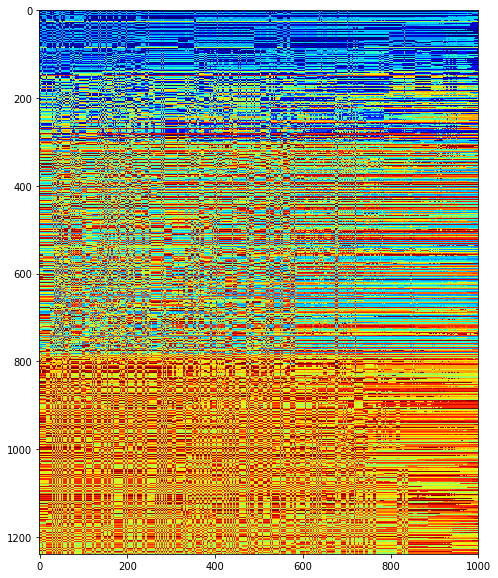

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(membership, cmap = 'jet')

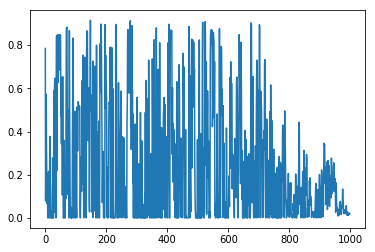

In [28]:
diff = np.diff(membership) <> 0

plt.plot(np.mean(diff, axis = 0))

In [74]:
a = membership[:,500::10].astype('int')

h,w = a.shape

eye = np.eye(w, dtype=bool)
corr = np.zeros((h, h), dtype = 'int')

for i, j in itertools.combinations(range(h), r = 2):

    mask = a[i][:,None] == a[j]
    corr[i,j] = mask[eye].sum()
#     corr[j,i] = mask[eye].sum()

corr_ = corr / float(w)

In [78]:
def predict_geosom(label, data):
    
    print label
    
    for k in c_data.Y.keys():
        c_data.Y[k] = [k] + list(data[k,:])
        
    t = current_time()

    c_data.cluster("geoSom", params, nRows=nRows, nCols=nCols, wType="queen", iters = 1000)
    c_data.exportArcData(output_dir + '/classes_' + label + '_' + str(t))
    c_data.exportOutputs(output_dir + '/output_' + label + '_' + str(t) + ".csv")

    c_data.outputCluster = {'r2a': [], 'r2aRoot': []}
    
    
    return np.array(c_data.region2areas)

In [7]:
import fairml
import clusterpy
from time import gmtime, strftime

import os
from glob import glob
import re


classify_data = pd.read_pickle('ganges_metrics/metrics_results/classify_data')
params = classify_data.columns.tolist()

strftime("%Y%m%d_%H%M%S", gmtime())
current_time = lambda: strftime("%Y%m%d_%H%M%S", gmtime())



In [8]:
classify_data2 = pd.read_pickle('ganges_metrics/metrics_results/classify_data2')
params = classify_data2.columns.tolist()

# filename = 'ganges_metrics/metrics_geosom/islands_properties2'
# c_data = clusterpy.importArcData(filename)

strftime("%Y%m%d_%H%M%S", gmtime())
current_time = lambda: strftime("%Y%m%d_%H%M%S", gmtime())



In [83]:
filename = 'ganges_metrics/metrics_geosom/islands_properties'
c_data = clusterpy.importArcData(filename)

for n in [4]:
    
    directory = str(n) + 'x' + str(n)
    
    output_dir = 'ganges_metrics/metrics_geosom/geoSom/' + directory
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    nRows = n
    nCols = n
    
    
    print '-' * 10
    print directory
    print '-' * 10
    
    #Iterative Orthogonal Feature Projection Algorithm (IOFP)
    out,_ = fairml.audit_model(predict_geosom, classify_data2, number_of_runs=1, distance_metric='FMindex')
    
    fig = fairml.plot_dependencies(
    out.median(),
    reverse_values=False,
    title=directory)
    
    plt.savefig(output_dir + '.png')
    plt.close()

----------
4x4
----------
FMindex
normal
ptb_col0
ptb_tot0
ptb_col1
ptb_tot1
ptb_col2
ptb_tot2
ptb_col3
ptb_tot3
ptb_col4
ptb_tot4
ptb_col5
ptb_tot5
ptb_col6
ptb_tot6
ptb_col7
ptb_tot7
ptb_col8
ptb_tot8
ptb_col9
ptb_tot9
ptb_col10
ptb_tot10
ptb_col11
ptb_tot11
ptb_col12
ptb_tot12
ptb_col13
ptb_tot13
ptb_col14
ptb_tot14
ptb_col15
ptb_tot15
ptb_col16
ptb_tot16
ptb_col17
ptb_tot17
ptb_col18
ptb_tot18
ptb_col19
ptb_tot19
ptb_col20
ptb_tot20
ptb_col21
ptb_tot21
ptb_col22
ptb_tot22
ptb_col23
ptb_tot23
ptb_col24
ptb_tot24
ptb_col25
ptb_tot25
ptb_col26
ptb_tot26
ptb_col27
ptb_tot27
ptb_col28
ptb_tot28
ptb_col29
ptb_tot29
ptb_col30
ptb_tot30
ptb_col31
ptb_tot31


In [132]:
# post-processing

importance0 = {}
importance1 = {}

for n in [4]:#range(3,19,2):
    
    directory = str(n) + 'x' + str(n)
    output_dir = 'ganges_metrics/metrics_geosom/geoSom/' + directory

    classes = pd.DataFrame()

    files = glob(output_dir + "/output_normal*")
    lines = open(files[0], "r").read().split(';')
    labels_normal = [int(i) for i in lines[18][1:-1].split(',')]


    files = glob(output_dir + "/output_ptb_col*")
    numbers = [int(re.search('output_ptb_col(.*)_2018',f).group(1)) for f in files]
    files_col = [files[i] for i in np.argsort(numbers)]

    files = glob(output_dir + "/output_ptb_tot*")
    numbers = [int(re.search('output_ptb_tot(.*)_2018',f).group(1)) for f in files]
    files_tot = [files[i] for i in np.argsort(numbers)]

    for j in range(len(files_tot)):

        lines = open(files_col[j], "r").read().split(';')
        col_name = re.search('output_(.*)_2018',files_col[j]).group(1)
        classes[col_name] = [int(i) for i in lines[18][1:-1].split(',')]

        lines = open(files_tot[j], "r").read().split(';')
        col_name = re.search('output_(.*)_2018',files_tot[j]).group(1)
        classes[col_name] = [int(i) for i in lines[18][1:-1].split(',')]


    out = fairml.orthogonal_projection.audit_model_alt(labels_normal,
                                                       classes,
                                                       classify_data2,
                                                       distance_metric='FMindex',
                                                       number_of_runs=1)




    importance0[n] = out[0].median() # complete perturbation (removes co-linearity)
    importance1[n] = out[1].median() # direct perturbation (preserves co-linearity)

In [73]:
from scipy.cluster.vq import kmeans,vq

def predict_kmeans(label, data):
    
    print label
    t = current_time()

    centroids,_ = kmeans(data, K, iter = 1000)
    result,_ = vq(data, centroids)
    
    np.savetxt(output_dir + '/output_' + label + '_' + str(t) + ".csv", result, delimiter=',',fmt='%u')

    return result


In [104]:
n = 5
directory = str(n) + 'x' + str(n)
source_dir = 'ganges_metrics/metrics_geosom/geoSom/' + directory

files = glob(source_dir + "/output_normal*")
lines = open(files[0], "r").read().split(';')
labels_normal = np.array([int(i) for i in lines[18][1:-1].split(',')])
i = 0

class_means = pd.DataFrame(columns = classify_data.columns.values)

for i in np.unique(labels_normal):
    ind = np.where(labels_normal == i)[0]
    class_means.loc[i] = classify_data.loc[ind].mean()


for K in [5]:

    directory = 'k_' + str(n) + 'x' + str(n)
    
    output_dir = 'ganges_metrics/metrics_geosom/geoSom/' + directory
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print '-' * 10
    print directory
    print '-' * 10
    
    out,_ = fairml.audit_model(predict_kmeans, class_means, number_of_runs=1, distance_metric='FMindex')
    
    fig = fairml.plot_dependencies(
    out.median(),
    reverse_values=False,
    title=directory)
    
    plt.savefig(output_dir + '.png')
    plt.close()

----------
k_5x5
----------
FMindex
normal
ptb_col0
ptb_tot0
ptb_col1
ptb_tot1
ptb_col2
ptb_tot2
ptb_col3
ptb_tot3
ptb_col4
ptb_tot4
ptb_col5
ptb_tot5
ptb_col6
ptb_tot6
ptb_col7
ptb_tot7
ptb_col8
ptb_tot8
ptb_col9
ptb_tot9
ptb_col10
ptb_tot10


In [115]:
# post-processing

importance0 = {}
importance1 = {}

for n in [4]:#range(3,19,2):
    
    directory = 'k_' + str(n) + 'x' + str(n)
    output_dir = 'ganges_metrics/metrics_geosom/geoSom/' + directory

    classes = pd.DataFrame()

    files = glob(output_dir + "/output_normal*")
    lines = open(files[0], "r").read().split('\n')
    labels_normal = [int(i) for i in lines[:-1]]


    files = glob(output_dir + "/output_ptb_col*")
    numbers = [int(re.search('output_ptb_col(.*)_2018',f).group(1)) for f in files]
    files_col = [files[i] for i in np.argsort(numbers)]

    files = glob(output_dir + "/output_ptb_tot*")
    numbers = [int(re.search('output_ptb_tot(.*)_2018',f).group(1)) for f in files]
    files_tot = [files[i] for i in np.argsort(numbers)]

    for j in range(len(files_tot)):

        col_name = re.search('output_(.*)_2018',files_col[j]).group(1)
        lines = open(files_col[j], "r").read().split('\n')
        classes[col_name] = [int(i) for i in lines[:-1]]

        col_name = re.search('output_(.*)_2018',files_tot[j]).group(1)
        lines = open(files_tot[j], "r").read().split('\n')
        classes[col_name] = [int(i) for i in lines[:-1]]


    out = fairml.orthogonal_projection.audit_model_alt(labels_normal,
                                                       classes,
                                                       classify_data2,
                                                       distance_metric='FMindex',
                                                       number_of_runs=1)




    importance0[n] = out[0].median() # complete perturbation (removes co-linearity)
    importance1[n] = out[1].median() # direct perturbation (preserves co-linearity)

<Container object of 32 artists>

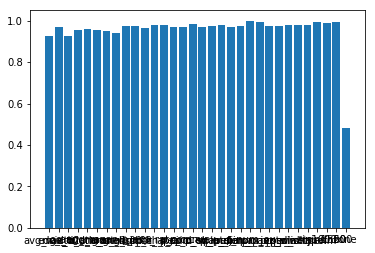

In [134]:
plt.bar(importance1[4].keys(),importance1[4].values())

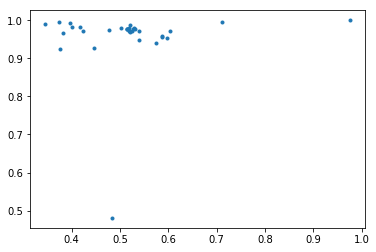

In [142]:
plt.plot(importance0[4].values(), importance1[4].values(), '.')

In [148]:
[(importance1[4].values()[i], importance0[4].values()[i]) for i in range(len(importance0[4].values()))]

[(0.9703763196280607, 0.52061772125811778),
 (0.98141892695177912, 0.41719797043188095),
 (0.97577416505202808, 0.51469111689599301),
 (0.97577416505202808, 0.51469111689599301),
 (0.94039977048623546, 0.57381226293217524),
 (0.96583244466202833, 0.38255302573347155),
 (0.97172502565090235, 0.5192272069199797),
 (0.94921535281124236, 0.53927212236737443),
 (0.97717070167782771, 0.52615254894550423),
 (0.48095600023484691, 0.48371508640153543),
 (0.97162504508772451, 0.52419475735056398),
 (0.97401613708471169, 0.47711295716527202),
 (0.97873485656450265, 0.51911610806679476),
 (0.95340537346526411, 0.597696591200368),
 (0.97865882157250472, 0.52837052155515329),
 (0.98048589452993096, 0.50145588186708834),
 (0.95706427466884392, 0.58685920957178761),
 (0.97188032489058274, 0.42311989861193372),
 (0.98675479219722162, 0.52058572091802824),
 (0.97755911061961986, 0.53132502259382663),
 (1.0, 0.97495731817571907),
 (0.97577416505202808, 0.51469111689599301),
 (0.97304803989940725, 0.53821

In [88]:
importance_values = np.array([[importance[k][j] for k in importance.keys()] for j in importance[4].keys()])

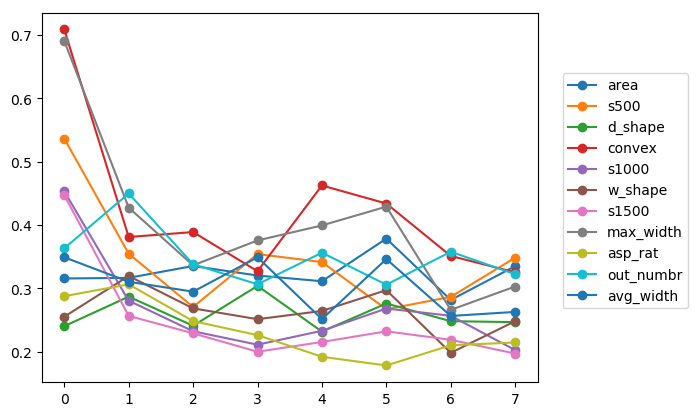

In [40]:
labels = importance[3].keys()

for i in range(len(labels)):

    plt.plot(importance_values[i,:], 'o-', label = labels[i])
    
plt.legend(loc = (1.05,0.2))

In [4]:
from sklearn.metrics.cluster import fowlkes_mallows_score as fm


normals = pd.DataFrame()

for n in range(3,19,2):
    
    directory = str(n) + 'x' + str(n)
    output_dir = 'ganges_metrics/metrics_geosom/geoSom/' + directory

    files = glob(output_dir + "/output_normal*")
    lines = open(files[0], "r").read().split(';')
    labels_normal = [int(i) for i in lines[18][1:-1].split(',')]
    
    normals[str(n)] = labels_normal
    

In [4]:
fmindex = np.ones((18,18))

for i,j in itertools.combinations(range(3,19,2),2):
    
    fmindex[i,j] = fm(normals[str(i)], normals[str(j)])
    fmindex[j,i] = fmindex[i,j]
    
    print str(i) + ' vs ' + str(j) + ': ' + str(fmindex[i,j])
    
    
fmindex = fmindex[3::2, 3::2]

3 vs 5: 0.36875207346
3 vs 7: 0.272996494573
3 vs 9: 0.216696525925
3 vs 11: 0.22039003725
3 vs 13: 0.181059462684
3 vs 15: 0.1722024409
3 vs 17: 0.152863176199
5 vs 7: 0.348976899027
5 vs 9: 0.262806910344
5 vs 11: 0.223144693763
5 vs 13: 0.192220420965
5 vs 15: 0.193512133277
5 vs 17: 0.171657609439
7 vs 9: 0.295935366329
7 vs 11: 0.255165571747
7 vs 13: 0.20727081197
7 vs 15: 0.206294551984
7 vs 17: 0.186297107739
9 vs 11: 0.255008313077
9 vs 13: 0.237607873094
9 vs 15: 0.245146453567
9 vs 17: 0.222658191017
11 vs 13: 0.345506311747
11 vs 15: 0.31181236433
11 vs 17: 0.295254953373
13 vs 15: 0.273433056164
13 vs 17: 0.279143822865
15 vs 17: 0.283742804301


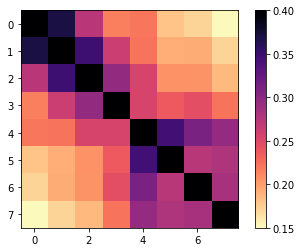

In [10]:
# 11x11 seems to be very similar to finer grids - ideal?

plt.imshow(fmindex, vmin = 0.15, vmax = 0.4, cmap = 'magma_r')
plt.colorbar()

In [11]:
def predict_kmeans(label, data):
    
    print 'K:', K, label
    
    t = current_time()

    classes_df = pd.DataFrame()
    
    sum_of_squares = np.zeros((20, K))

    for i in range(20):

        centroids,_ = kmeans(data, K, iter = 1500)
        classes_df[i],_ = vq(data, centroids)

        # for each class found by kmeans
        for k in range(K):

            class_centroid = centroids[k,:]
            class_data = data[k,:]

            sum_of_squares[i,k] = np.sum((class_data - class_centroid)**2)

    sum_sum_squares = np.sum(sum_of_squares, axis=1)
    good_loc = np.where(sum_sum_squares == sum_sum_squares.min())[0][0]

    nclass = np.zeros((len(normals),))

    for i in IDs:
        loc = normals[str(n)] == i
        nclass[loc] = classes_df[good_loc].values[i]

    pickle.dump(nclass, open(output_dir + '/kmeans_' + label + '_' + str(K) + '.p', 'wb'))
    
    return list(nclass)

In [12]:
from scipy.cluster.vq import kmeans,vq


n = 13

directory = str(n) + 'x' + str(n)
output_dir = 'ganges_metrics/metrics_geosom/geoSom/' + directory

print '-' * 10
print directory
print '-' * 10
    
    
kmeans_class = pd.DataFrame()
nclass = np.zeros((len(normals),))


IDs = np.unique(normals[str(n)])
component_averages = np.zeros((len(IDs), len(params)))

for i in IDs:

    inds = np.where(normals[str(n)] == i)[0]
    data = classify_data.iloc[inds]

    component_averages[int(i),:] = np.mean(data, axis=0)

    if len(inds) == 1:
        component_averages[int(i),:] = data

        
data = pd.DataFrame(component_averages, columns=params)

for K in range(3,9):
    
    out,_ = fairml.audit_model(predict_kmeans, data, number_of_runs=1, distance_metric='FMindex')
    
    fig = fairml.plot_dependencies(
    out.median(),
    reverse_values=False,
    title=directory)
    
    plt.savefig(output_dir + '/Kmeans_' + str(K) + '.png')

    
    plt.close()

----------
13x13
----------
FMindex
K: 3 normal
K: 3 ptb_col0
K: 3 ptb_tot0
K: 3 ptb_col1
K: 3 ptb_tot1
K: 3 ptb_col2
K: 3 ptb_tot2
K: 3 ptb_col3
K: 3 ptb_tot3
K: 3 ptb_col4
K: 3 ptb_tot4
K: 3 ptb_col5
K: 3 ptb_tot5
K: 3 ptb_col6
K: 3 ptb_tot6
K: 3 ptb_col7
K: 3 ptb_tot7
K: 3 ptb_col8
K: 3 ptb_tot8
K: 3 ptb_col9
K: 3 ptb_tot9
K: 3 ptb_col10
K: 3 ptb_tot10
FMindex
K: 4 normal
K: 4 ptb_col0
K: 4 ptb_tot0
K: 4 ptb_col1
K: 4 ptb_tot1
K: 4 ptb_col2
K: 4 ptb_tot2


KeyboardInterrupt: 

In [27]:

n = 13

zones = fields['zone']

xy = np.array([list(i.representative_point().coords[0]) for i in islands])

IDs = np.unique(normals[str(n)])
loc_avg = np.zeros((len(IDs), 2))

for i in IDs:

    inds = np.where(normals[str(n)] == i)[0]
    data = xy[inds]

    loc_avg[int(i),:] = np.mean(data, axis=0)

    if len(inds) == 1:
        loc_avg[int(i),:] = data

In [29]:
loc_avg.shape

(136, 2)

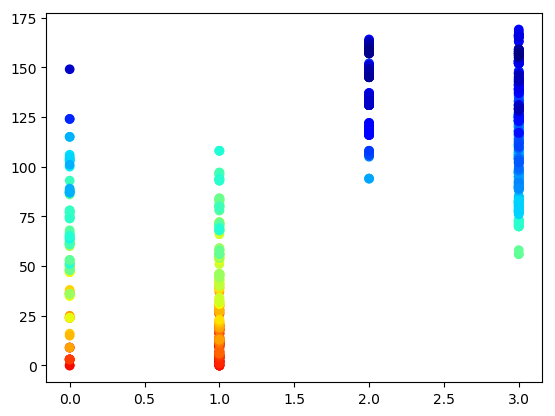

In [57]:
plt.scatter(zones, normals['15'], c = xy[:,1], cmap = 'jet')

In [56]:
pd.crosstab(zones, normals['17'])

17     0    1    2    3    4    5    6    7    8    9   ...   201  202  203  \
row_0                                                   ...                   
0.0      0    2    0    0    0    6    1    0    0    0 ...     0    0    0   
1.0      8    3    6    2    5    6    3    4    4    6 ...     0    0    0   
2.0      0    0    0    0    0    0    0    0    0    0 ...     8   13    2   
3.0      0    0    0    0    0    0    0    0    0    0 ...     0    0    0   

17     204  205  206  207  208  209  210  
row_0                                     
0.0      0    0    0    0    0    0    0  
1.0      0    0    0    0    0    0    0  
2.0      3    1    0    0    0    0    0  
3.0      1    1    1    3    5    4    1  

[4 rows x 211 columns]

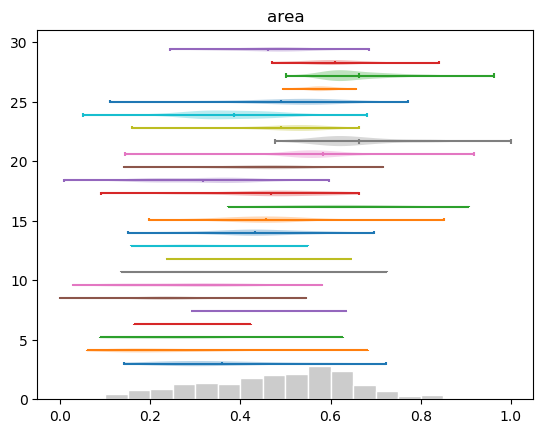

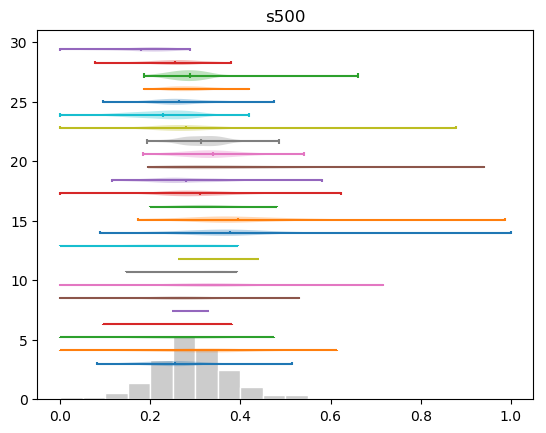

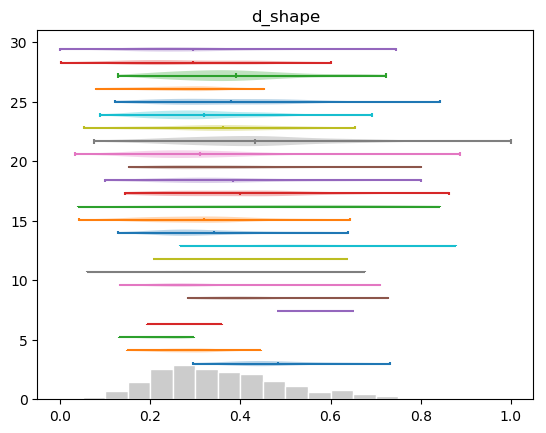

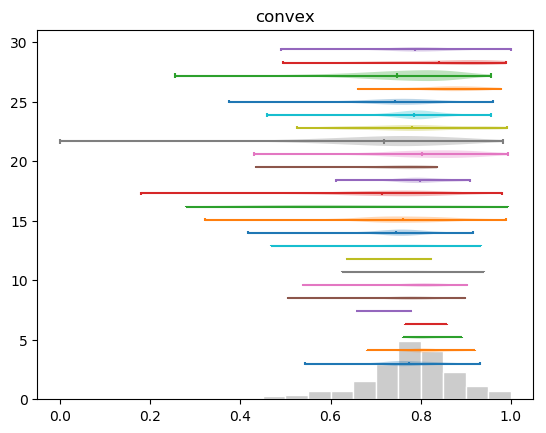

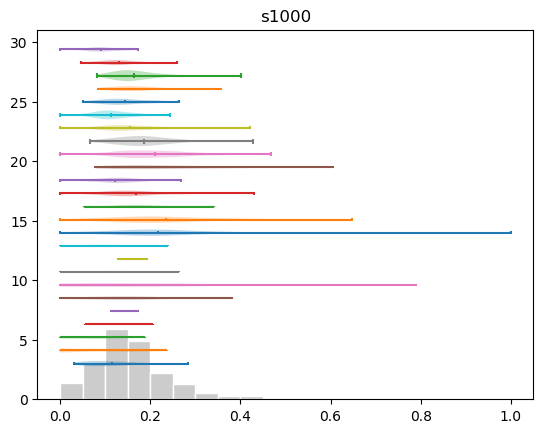

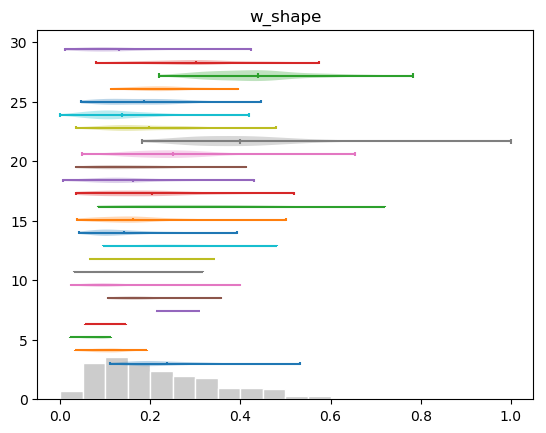

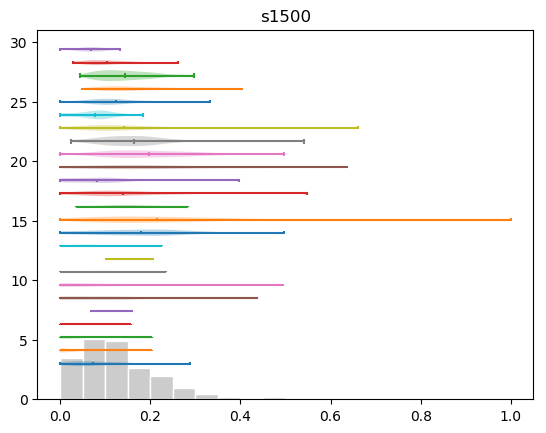

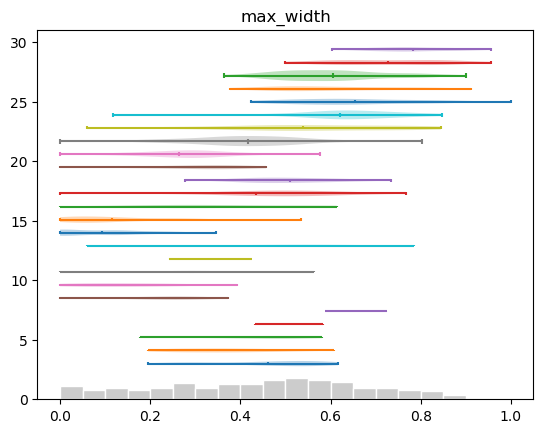

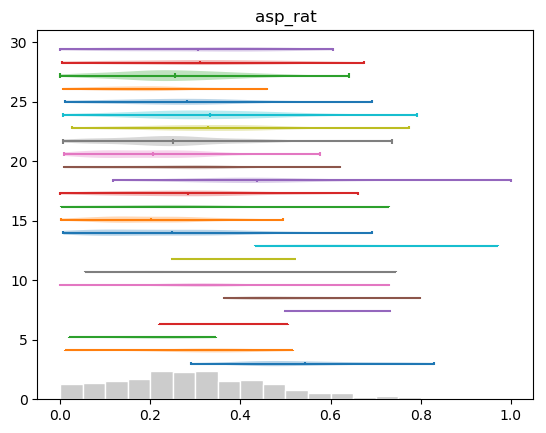

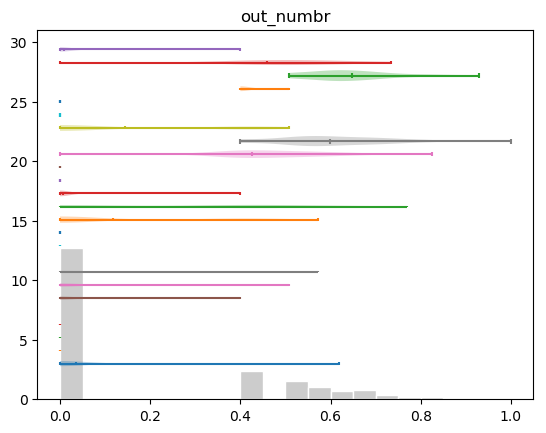

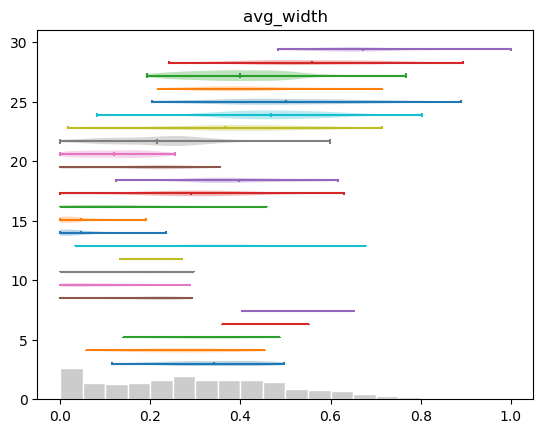

In [154]:
n = 5
ind = normals[str(n)].values

maxw = float(len(classify_data))

for c in labels:
    
    plt.figure()
    plt.title(c)
    
    plt.hist(classify_data[c], range=(0,1), bins = 20, color = '0.8', edgecolor = 'w', zorder = 0, normed = True)

#     parts = plt.violinplot(classify_data[c],
#                    showmeans=True,
#                    showmedians=False,
#                     vert = False, positions = [0], widths = [2])
        
#     for pc in parts['bodies']:
#         pc.set_color('black')
        
    for partname in ('cbars','cmins','cmaxes','cmeans'):
        vp = parts[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    for i in np.unique(ind):
        
        data = classify_data[c][ind == i]

        plt.violinplot(data,
                   showmeans=True,
                   showmedians=False,
                    vert = False, positions = [i*1.1+3], widths = [len(data)/maxw * 10])


In [149]:
# http://www.ritchieng.com/machine-learning-project-customer-segments/

In [56]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from sklearn.decomposition import pca

def pca_results_funct(good_data, pca, plot = False):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	if plot:
        
	    # Create a bar plot visualization
	    fig, ax = plt.subplots(figsize = (14,8))

	    # Plot the feature weights as a function of the components
	    components.plot(ax = ax, kind = 'bar');
	    ax.set_ylabel("Feature Weights")
	    ax.set_xticklabels(dimensions, rotation=0)


	    # Display the explained variance ratios
	    for i, ev in enumerate(pca.explained_variance_ratio_):
        	ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

def cluster_results(reduced_data, preds, centers):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)
	cols = reduced_data.columns.values

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('tab10')
    

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = cols[0], y = cols[1], \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=100, alpha = 0.2);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);



	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");



In [947]:
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

classify_data2 = pd.read_pickle('ganges_metrics/metrics_results/classify_data2')

# zones = classify_data2['zone']
classify_data2.drop('zone', axis = 1, inplace = True)
classify_data2.drop('p_int_len', axis = 1, inplace = True)
classify_data2.drop('p_orient', axis = 1, inplace = True)

classify_data2.drop('o_ang_std', axis = 1, inplace = True)
classify_data2.drop('o_ang_min', axis = 1, inplace = True)
classify_data2.drop('o_ang_mean', axis = 1, inplace = True)
classify_data2.drop('o_ang_med', axis = 1, inplace = True)
classify_data2.drop('o_ang_max', axis = 1, inplace = True)

# classify_data2.drop('p_label', axis = 1, inplace = True)
# classify_data2.drop('label', axis = 1, inplace = True)

# classify_data2.drop('ang1', axis = 1, inplace = True)min
# classify_data2.drop('ang2', axis = 1, inplace = True)
# classify_data2.drop('ang0', axis = 1, inplace = True)
# classify_data2.drop('id', axis = 1, inplace = True)

# classify_data2.drop('aspt_ratio', axis = 1, inplace = True)
# classify_data2.drop('ch_ang_std', axis = 1, inplace = True)
# classify_data2.drop('id', axis = 1, inplace = True)
# classify_data2.drop('id', axis = 1, inplace = True)



In [948]:
classify_data2.columns

Index([u'p_ch_area', u'p_eq_a_dia', u'min_width', u'p_area', u'p_asp_rat',
       u'p_concav', u'p_perim', u'p_major_ax', u'out_numbr', u'edge_d2',
       u'p_ch_perim', u'p_solidity', u'r_perim', u'p_d_shapef', u'p_convex',
       u'p_wetperim', u'p_num_ox', u'p_p_eq_dia', u'p_minor_ax', u'p_w_shapef',
       u'sin1500', u'p_circ', u'avg_width', u'sin500', u'max_width',
       u'sin1000'],
      dtype='object')

In [949]:
classify_data2.columns = ['Convex hull Area', 'Equivalent-area Diameter', 'Min. Channel Width', 
                          'Area', 'Aspect Ratio',
                          'Concavity','Dry Perimeter', 'Major Axis','Num. Outflow Channels',
                          'Max. Distance to Edge', 'Convex hull Perimeter', 'Solidity','Wet/Dry Perimeter Ratio',
                          'Dry Shape Factor', 'Convexity','Wet Perimeter','Number of Oxbows',
       'Perimeter-equiv. Diameter', 'Minor Axis', 'Wet Shape Factor', 'Sinuosity (1500 m)', 'Circularity',
                          'Avg. Channel Width', 'Sinuosity (500 m)',  'Max. Channel Width', 'Sinuosity (1000 m)']
                        

In [833]:
# classify_data2.columns = ['Convex hull Area', 'Max. Channel Width', 'Equivalent-area Diameter', 'Area', 'Aspect Ratio',
#        'Concavity', 'Dry Perimeter', 'Major Axis', 'Avg. Channel Width', 'Max. Distance to Edge',
#        'Solidity', 'Dry Shape Factor', 'Convexity', 'Wet Perimeter', 'Number of Oxbows',
#        'Perimeter-equiv. Diameter', 'Minor Axis', 'Wet Shape Factor', 'Sinuosity (1500 m)', 'Circularity',
#        'Num. Outflow Channels', 'Sinuosity (500 m)', 'Convex hull Perimeter', 'Sinuosity (1000 m)']

In [950]:
# classify_data2 = classify_data2[['Area', 'Convex hull Area', 'Dry Perimeter', 'Wet Perimeter', 'Convex hull Perimeter',
#  'Aspect Ratio', 'Major Axis', 'Minor Axis', 
#  'Dry Shape Factor', 'Wet Shape Factor','Max. Distance to Edge',
#  'Equivalent-area Diameter', 'Perimeter-equiv. Diameter',
#  'Concavity', 'Convexity', 'Circularity','Solidity',
#  'Num. Outflow Channels','Number of Oxbows',
#  'Max. Channel Width', 'Avg. Channel Width', 
#  'Sinuosity (500 m)',  'Sinuosity (1000 m)','Sinuosity (1500 m)']]

classify_data2 = classify_data2[['Area','Wet/Dry Perimeter Ratio',
 'Aspect Ratio', 'Wet Shape Factor',
 'Convexity', 'Circularity','Solidity',
 'Num. Outflow Channels',
 'Min. Channel Width', 'Max. Channel Width', 'Avg. Channel Width', 
 'Sinuosity (500 m)',  'Sinuosity (1000 m)','Sinuosity (1500 m)']]

In [952]:
'''Principal component analysis (PCA) is a statistical procedure
that uses an orthogonal transformation to convert a set of
observations of possibly correlated variables into a set of
values of linearly uncorrelated variables called principal components
'''


output_dir = 'ganges_metrics/metrics_geosom/PCA_figs2/'

pca = PCA(n_components=10)
pca.fit(classify_data2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(classify_data2)



# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data)

pca_results = pca_results_funct(classify_data2, pca)
explained_variance = pca.explained_variance_ratio_
print 'Explained variance:', sum(explained_variance)*100, '%'

Explained variance: 98.6958198105 %


Explained Variance    Area  Wet/Dry Perimeter Ratio  \
Dimension 1               0.3291  0.3680                   0.5169   
Dimension 2               0.2709  0.2028                   0.2664   
Dimension 3               0.1451 -0.0404                  -0.2581   
Dimension 4               0.0774  0.2832                  -0.3154   
Dimension 5               0.0442  0.1621                   0.0639   
Dimension 6               0.0403 -0.1020                   0.0427   
Dimension 7               0.0264 -0.8057                   0.2187   
Dimension 8               0.0233 -0.1095                  -0.1177   
Dimension 9               0.0183 -0.0031                   0.4760   
Dimension 10              0.0121  0.2071                  -0.0210   

              Aspect Ratio  Wet Shape Factor  Convexity  Circularity  \
Dimension 1        -0.0365            0.3258    -0.0655      -0.0971   
Dimension 2        -0.1442            0.2013    -0.1169      -0.1121   
Dimension 3         0.5510            0.2020    -0.2537      -0.6294   
Dimension 4        -0.5879           -0.0963    -0.3427      -0.1312   
Dimension 5         0.3565           -0.0296     0.2183       0.1179   
Dimension 6        -0.2246            0.0988    -0.3657      -0.1417   
Dimension 7        -0.1650            0.1493    -0.1438      -0.0623   
Dimension 8        -0.1599           -0.1037     0.4720       0.0770   
Dimension 9        -0.0550            0.2550     0.1290      -0.0058   
Dimension 10        0.0106           -0.0038    -0.0143      -0.0136   

              Solidity  Num. Outflow Channels  Min. Channel Width  \
Dimension 1    -0.1196                 0.3826              0.0123   
Dimension 2    -0.1746                 0.2596             -0.2963   
Dimension 3    -0.3408                -0.0923             -0.0002   
Dimension 4    -0.1781                -0.2653             -0.0184   
Dimension 5     0.1551                 0.0187              0.3783   
Dimension 6     0.1226                 0.1799              0.7763   
Dimension 7    -0.0233                 0.0905             -0.1432   
Dimension 8    -0.7737                 0.2098              0.2504   
Dimension 9    -0.1822                -0.7756              0.1152   
Dimension 10   -0.0064                -0.0810             -0.0052   

              Max. Channel Width  Avg. Channel Width  Sinuosity (500 m)  \
Dimension 1               0.4567              0.3187            -0.0698   
Dimension 2              -0.5185             -0.5292             0.1621   
Dimension 3               0.0272              0.0207            -0.0071   
Dimension 4               0.2031              0.1111             0.1672   
Dimension 5              -0.0864              0.1138             0.4143   
Dimension 6              -0.2935              0.0012            -0.0861   
Dimension 7               0.1460              0.1181             0.3489   
Dimension 8              -0.0317              0.0230             0.0225   
Dimension 9              -0.1661              0.0653            -0.0841   
Dimension 10             -0.0203              0.0794             0.7489   

              Sinuosity (1000 m)  Sinuosity (1500 m)  
Dimension 1              -0.0148              0.0032  
Dimension 2               0.1354              0.1454  
Dimension 3               0.0137              0.0294  
Dimension 4               0.2356              0.3021  
Dimension 5               0.4599              0.4573  
Dimension 6              -0.1180             -0.1276  
Dimension 7               0.1797              0.1021  
Dimension 8              -0.0251             -0.0322  
Dimension 9              -0.0422              0.0032  
Dimension 10             -0.1642             -0.5959

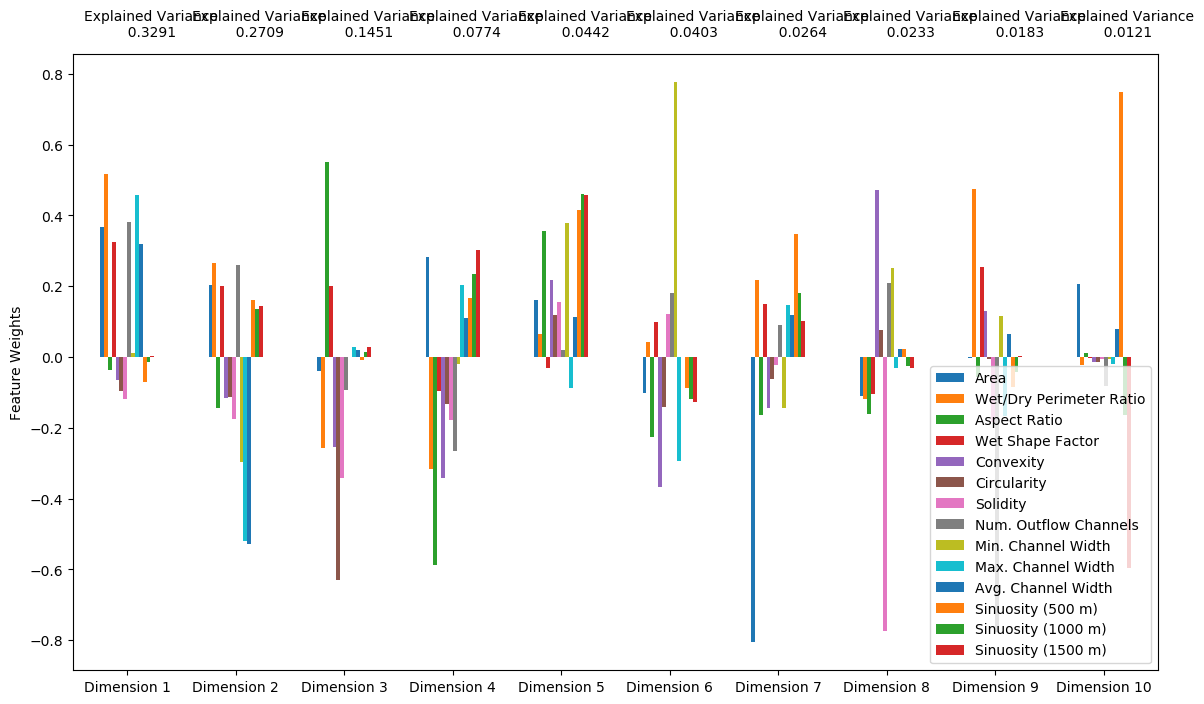

In [953]:
pca_results_funct(classify_data2,pca,plot=True)

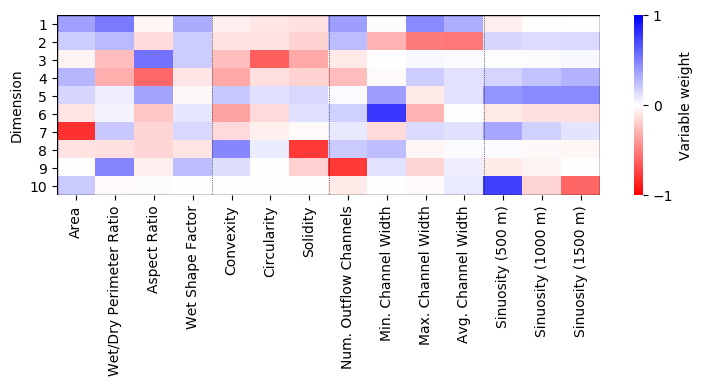

In [955]:
plt.figure(figsize=(7,4))

data = pca_results[classify_data2.columns.values]

ax = sns.heatmap(data,
            vmin=-1, vmax = 1,
            cmap = 'bwr_r',
            cbar_kws={'label': 'Variable weight', 'ticks': [-1,0,1]},
            xticklabels = classify_data2.columns.values)
ax.set_yticklabels(range(1,11),rotation = 0);
ax.set_ylabel('Dimension')

ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=data.shape[0], color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=data.shape[1], color='k',linewidth=1)


vlines = [4, 7, 11]

for x in vlines:
    ax.axvline(x=x, color='k',linewidth=0.5, ls = ':')


plt.subplots_adjust(left = 0.08, right = 1.05, top = 0.95, bottom = 0.5)

plt.savefig(output_dir + 'variable_weight.png', dpi = 300, )    

In [960]:
plt.figure(figsize=(5, 3))

plt.grid(zorder=1, alpha = 0.25)
plt.bar(range(len(explained_variance)),explained_variance*100, zorder=2)
plt.plot(range(len(explained_variance)),explained_variance*100, 'ko-', zorder=3)
plt.xlabel('Dimension')
plt.ylabel('Percentage of explained variances')
plt.ylim(0,40)
plt.xticks(range(0,10), range(1,11))

labels = ['{:.1%}'.format(i) for i in explained_variance]
labels = [i if i[0]<>'0' else i[1:] for i in labels]


for label, x, y in zip(labels, range(len(explained_variance)), explained_variance*100):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2,8),
        textcoords='offset points', ha='left', va='center', size=10)
    
plt.savefig(output_dir + 'scree_plot.png', dpi = 300)    
plt.close()

In [957]:
reduced_data.columns = ['PCA' + str(k) for k in reduced_data.columns.values if type(k) <> 'str']

field_type = {}

for k in reduced_data.columns:
    field_type[k] = ogr.OFTReal
    

create_shapefile_from_shapely_multi(islands,
                                    'ganges_metrics/metrics_geosom/islands_properties_pca10_3.shp',
                                    fields = reduced_data,
                                    field_type = field_type)

pd.to_pickle(reduced_data, 'ganges_metrics/metrics_results/reduced_data.p')

In [718]:
# plot individual dimensions of PCA

from descartes import PolygonPatch
import shapefile
import matplotlib.patches as mpatches

filename = 'ganges_metrics/metrics_geosom/islands_properties_pca10_2.shp'

files = [filename]

polys = []

for nn,poly in enumerate(sf.shapeRecords()):
    
    poly_geo=poly.shape.__geo_interface__
    ps = [Polygon(p) for p in poly_geo['coordinates']]
    polys.append(ps[0])
    

for fname in files:
    

    sf = shapefile.Reader(fname)

    fields = [f[0] for f in sf.fields[1:]]

    vals = {}
    colors = {}
    for n,field in enumerate(fields):
        
        vals[field] = [r.record[n] for r in sf.shapeRecords()]
        
        minval = np.median(vals[field]) - 3*np.std(vals[field])
        maxval = np.median(vals[field]) + 3*np.std(vals[field])
        rangeval = maxval - minval
        
        scaled_vals = (np.array(vals[field]) - minval) / rangeval
        scaled_vals[scaled_vals > 1] = 1
        scaled_vals[scaled_vals < 0] = 0
        
        colors[field] = plt.cm.YlGnBu(scaled_vals)



    for n,field in enumerate(fields):
        
        print field
        
        minval = np.median(vals[field]) - 3*np.std(vals[field])
        maxval = np.median(vals[field]) + 3*np.std(vals[field])

        fig = plt.figure(figsize=(20,20)) 
        ax = fig.gca() 

        for nn,poly in enumerate(polys):

            c = colors[field][nn]
            ax.add_patch(PolygonPatch(poly, fc=c, ec=c))



        fname_out = fname[30:-4] + '_' + field + '.png'

        ax.axis('scaled')
        plt.title(fname_out[:-4])
        
        norm = mpl.colors.Normalize(vmin=minval, vmax=maxval)

        ax1 = fig.add_axes([0.80, 0.5, 0.02, 0.3])
        cb1 = mpl.colorbar.ColorbarBase(ax1, cmap='YlGnBu',
                                        norm=norm,
                                        orientation='vertical')

#         class_num = set(vals[field])
#         handles = []

#         for cn in class_num:
#             color_val = colors[field][np.where(np.array(vals[field]) == cn)[0][0]]
#             handles.append(mpatches.Patch(color=color_val, label=str(int(cn))))

#         plt.legend(handles = handles, loc = 1, fontsize = 'xx-large', markerscale = 20)


        plt.savefig(output_dir + fname_out, dpi = 150)    
        plt.close()
    
    print '\n'

PCA0
PCA1
PCA2
PCA3
PCA4
PCA5
PCA6
PCA7
PCA8
PCA9




In [958]:
# convert shapefile into list of polygons

from descartes import PolygonPatch
import shapefile
import matplotlib.patches as mpatches

filename = 'ganges_metrics/metrics_geosom/islands_properties_pca10_3.shp'

files = [filename]

for fname in files:
    

    sf = shapefile.Reader(fname)

    fields = [f[0] for f in sf.fields[1:]]

    vals = {}
    colors = {}
    for n,field in enumerate(fields):
        
        vals[field] = [r.record[n] for r in sf.shapeRecords()]
        
        minval = np.median(vals[field]) - 3*np.std(vals[field])
        maxval = np.median(vals[field]) + 3*np.std(vals[field])
        rangeval = maxval - minval
        
        scaled_vals = (np.array(vals[field]) - minval) / rangeval
        scaled_vals[scaled_vals > 1] = 1
        scaled_vals[scaled_vals < 0] = 0
        
        colors[field] = plt.cm.YlGnBu(scaled_vals)

    polys = []

    for nn,poly in enumerate(sf.shapeRecords()):

        poly_geo=poly.shape.__geo_interface__
        ps = [Polygon(p) for p in poly_geo['coordinates']]
        polys.append(ps[0])

In [959]:
# plot subplots of PCA

f, ax = plt.subplots(5,2, figsize=(4,8), gridspec_kw = {'wspace':0, 'hspace':0})
ax = ax.flatten()

bounds = MultiPolygon(polys).bounds
    
labels = ['{:.1%}'.format(i) for i in explained_variance]
    
for n,field in enumerate(fields):

    print field

    minval = np.median(vals[field]) - 3*np.std(vals[field])
    maxval = np.median(vals[field]) + 3*np.std(vals[field])

    for nn,poly in enumerate(polys):
        
        if poly.area > 100000:

            c = colors[field][nn]
            ax[n].add_patch(PolygonPatch(poly, fc=c, ec=c))

            
    ax[n].set_aspect('equal')
    ax[n].tick_params(labelbottom='off', labelleft='off') 
    ax[n].set_xlim(bounds[0], bounds[2])
    ax[n].set_ylim(bounds[1], bounds[3])
    ax[n].xaxis.set_ticks_position('none')
    ax[n].yaxis.set_ticks_position('none')
    
    
    for d in ["left", "top", "bottom", "right"]:
        ax[n].spines[d].set_visible(False)
        
    
    label = 'Dimension ' + str(n + 1) + '\n' + labels[n]
    
    if n%2 == 1:
        ax[n].yaxis.set_label_position("right")
        ax[n].set_ylabel(label, rotation = -90)
        ax[n].yaxis.set_label_coords(1.2,0.5)
    else:
        ax[n].set_ylabel(label)
    

    

    
    
    
norm = mpl.colors.Normalize(vmin=-3, vmax=3)
ax1 = f.add_axes([0.25, 0.06, 0.5, 0.01])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap='YlGnBu',
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Standard deviations from median value')
    

    
    
    
f.subplots_adjust(wspace=0, hspace=0, bottom = 0.1, top = 0.99)

plt.savefig(output_dir + 'PCA.png', dpi = 300, pad_inches = 1)    
plt.close()

PCA0
PCA1
PCA2
PCA3
PCA4
PCA5
PCA6
PCA7
PCA8
PCA9


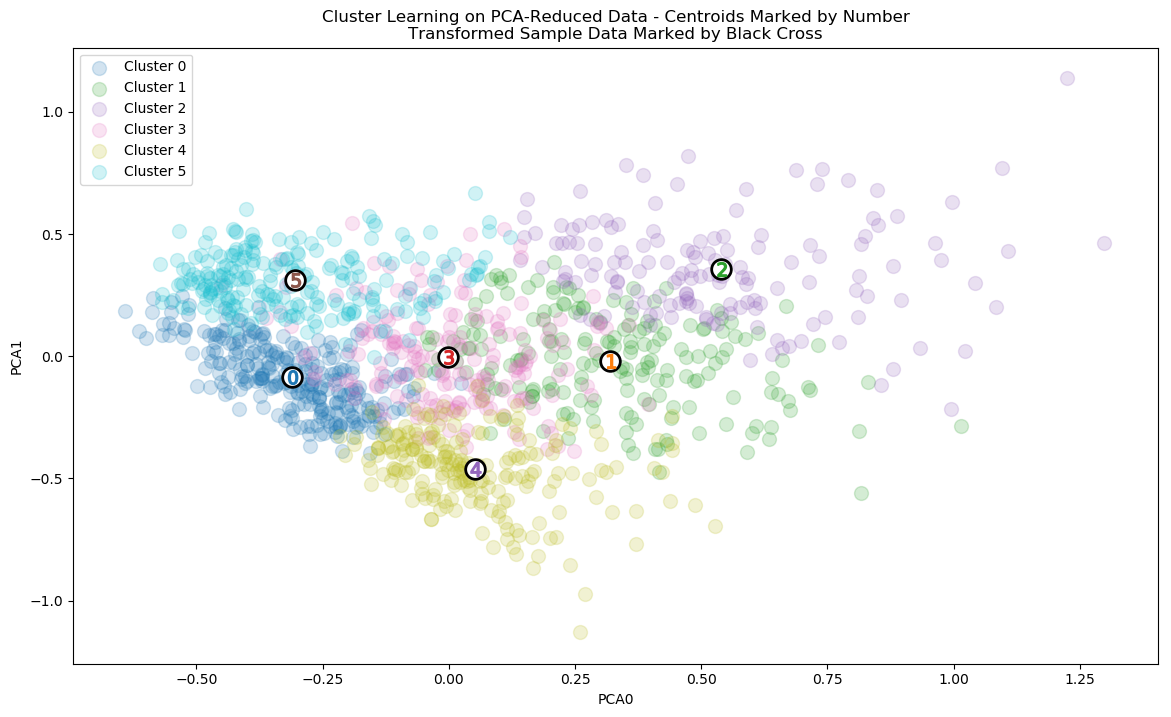

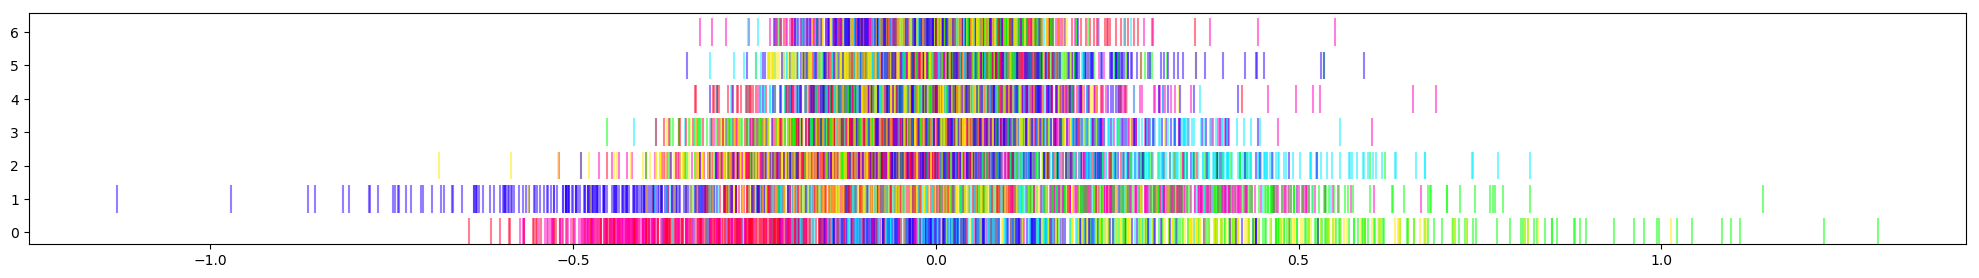

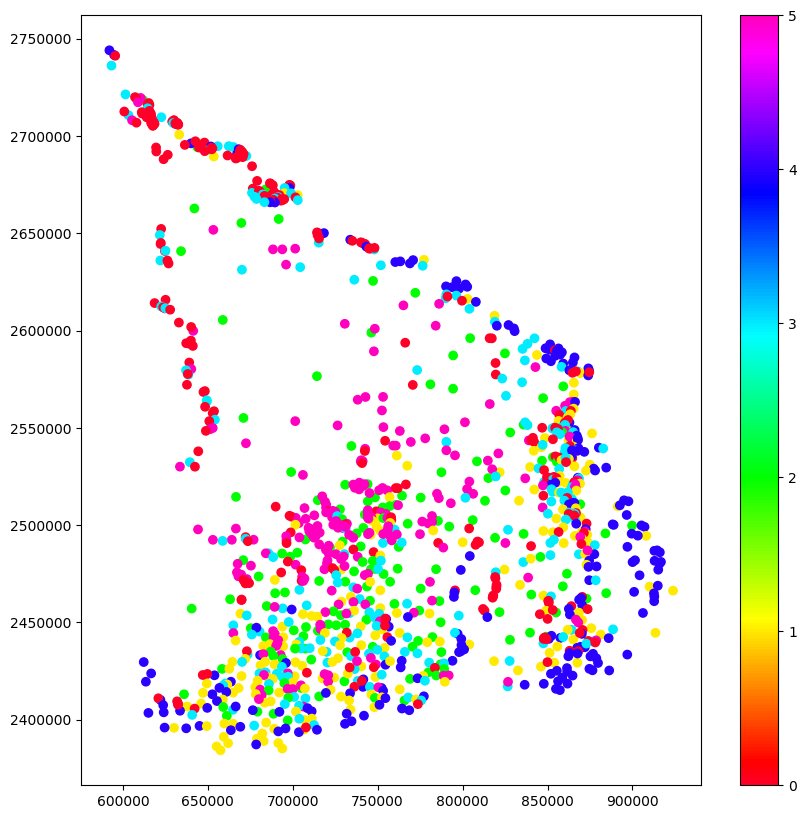

In [961]:
clusterer = KMeans(n_clusters=6).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_

cluster_results(reduced_data, preds, centers)


plt.figure(figsize=(25,3))

for i in range(7):
    plt.scatter(reduced_data.values[:,i],np.zeros((len(islands),)) + i, c = preds, marker = '|',alpha = 0.5, cmap = 'gist_rainbow', s=400)

x = [i.centroid.coords[0][0] for i in islands]
y = [i.centroid.coords[0][1] for i in islands]

plt.figure(figsize=(10,10))
plt.scatter(x,y, c = preds, cmap = 'gist_rainbow')
plt.colorbar()

In [962]:
from glob import glob
import random
from matplotlib.patches import Ellipse


symbols = ['o', 's', '^', 'X', '*', 'V']
symbols2 = ['.', '+', '3', 'x', '1', '4']

files = glob('ganges_metrics/metrics_geosom/geoSom_PCA2/*x*/classes_*.shp')

output_dir = 'ganges_metrics/metrics_geosom/PCA_figs2/'
colors = np.vstack((plt.cm.tab10(range(10)),plt.cm.Set2(range(8)),plt.cm.Set3(range(12))))

vals = {}
all_classes = {}

color_rand = np.array([0,0,0,0])

for fname in files:
    
    fname_out = fname.split('/')[-1].split('_')[-1].split('.')[0] + '.png'
    fname_out2 = 'scatter_' + fname.split('/')[-1].split('_')[-1].split('.')[0] + '.png'
    fname_out3 = 'scatter2_' + fname.split('/')[-1].split('_')[-1].split('.')[0] + '.png'
    
    
    
    

    sf = shapefile.Reader(fname)
    
    vals[fname_out[:-4]] = np.array([int(r.record[-1]) for r in sf.shapeRecords()])
    classes = {}
    areas = []

    for i in np.unique(vals[fname_out[:-4]]):

        inds = np.where(vals[fname_out[:-4]] == i)[0]
        classes[i] = [polys[ind] for ind in range(len(polys)) if ind in inds]
        areas.append(max([p.area for p in classes[i]]))

    all_classes[fname_out[:-4]] = classes
    large_classes = [a>3000000 for a in areas]
    
    
    
    class_means = pd.DataFrame(columns = reduced_data.columns.values)
    class_ind = []

    for i in np.unique(vals[fname_out[:-4]]):
        ind = np.where(vals[fname_out[:-4]] == i)[0]
        class_means.loc[i] = reduced_data.loc[ind].mean()
        class_ind.append(ind)


        
    f, ax = plt.subplots(1,1, figsize=(10,10))
    nn = 0
    symbol = 'o'
    
    for n,i in enumerate(np.argsort(areas)[::-1]):


        c = colors[nn]

        nn += 1
        if nn >= len(colors):
            color_rand = np.array([random.random()/10, random.random()/10, random.random()/10, 0])
            nn = 0
                
        if large_classes[i]:

            for p in classes[i]:
                ax.add_patch(PolygonPatch(p, fc=c, ec=c))
                

    ax.set_xlim(bounds[0], bounds[2])
    ax.set_ylim(bounds[1], bounds[3])

    ax.set_aspect('equal')
    
    plt.title(fname_out[:-4])
    plt.savefig(output_dir + fname_out, dpi = 150)    
    plt.close()
    
    
#     color_rand = np.array([0,0,0, 0])
    
#     f0, ax0 = plt.subplots(1,1, figsize=(10,10))
#     nn = 0
#     mn = 0
#     symbol = 'o'
#     symbol2 = '.'
    
#     for n,i in enumerate(np.argsort(areas)[::-1]):


#         c = colors[nn]

#         nn += 1
#         if nn >= len(colors):
#             nn = 0
#             color_rand = np.array([random.random(), random.random(), random.random(), 0])
#             mn += 1
#             symbol = symbols[mn]
#             symbol2 = symbols2[mn]
                
                
                
#         ax0.scatter(reduced_data.loc[class_ind[i],0],reduced_data.loc[class_ind[i],1], c = c, marker = symbol2, s = 20, alpha = 0.7)
#         ax0.scatter(class_means.loc[i,0], class_means.loc[i,1], c = c, marker = symbol, s = 150)
        
        
        
# #         if len(class_ind[i])>1:
        
# #             cov = np.cov(reduced_data.loc[class_ind[i],0], reduced_data.loc[class_ind[i],1])
# #             lambda_, v = np.linalg.eig(cov)
# #             lambda_ = np.sqrt(lambda_)

# #             j = 1
# #             ell = Ellipse(xy=(class_means.loc[i,0], class_means.loc[i,1]),
# #                       width=lambda_[0]*j*2, height=lambda_[1]*j*2,
# #                       angle=np.rad2deg(np.arccos(v[0, 0])), ec = c)
# #             ell.set_facecolor('none')
# #             ax0.add_artist(ell)
        
    
# #     ax0.set_aspect('equal')
    
#     ax0.spines['left'].set_position('center')
#     ax0.spines['bottom'].set_position('center')
    
#     # Eliminate upper and right axes
#     ax0.spines['right'].set_color('none')
#     ax0.spines['top'].set_color('none')

#     # Show ticks in the left and lower axes only
#     ax0.xaxis.set_ticks_position('bottom')
#     ax0.yaxis.set_ticks_position('left')
    
#     plt.title(fname_out[:-4])
#     plt.savefig(output_dir + fname_out2, dpi = 150)    
#     plt.close()
    
    

    

In [963]:
from scipy.cluster.vq import kmeans,vq

classify_data = pd.read_pickle('ganges_metrics/metrics_results/classify_data')

symbols = ['o', 's', '^', 'X', '*', 'V']
symbols2 = ['.', '+', '3', 'x', '1', '4']

files = glob('ganges_metrics/metrics_geosom/geoSom_PCA2/*/classes_*.shp')

output_dir = 'ganges_metrics/metrics_geosom/PCA_figs2/'
output_dir_GIS = 'ganges_metrics/metrics_geosom/PCA_shp2/'
colors = np.vstack((plt.cm.tab10(range(10)),plt.cm.Set2(range(8)),plt.cm.Set3(range(12))))

vals = {}
all_classes = {}

files = ['ganges_metrics/metrics_geosom/geoSom_PCA2/9x9/classes_9x9.shp', 
         'ganges_metrics/metrics_geosom/geoSom_PCA2/8x8/classes_8x8.shp',
 'ganges_metrics/metrics_geosom/geoSom_PCA2/11x11/classes_11x11.shp',
 'ganges_metrics/metrics_geosom/geoSom_PCA2/10x10/classes_10x10.shp']

for fname in files:
    
    print fname
    root_name = fname.split('/')[-1].split('_')[-1].split('.')[0]
    
    
    sf = shapefile.Reader(fname)
    
    vals[root_name] = np.array([int(r.record[-1]) for r in sf.shapeRecords()])
    classes = {}

    for i in np.unique(vals[root_name]):

        inds = np.where(vals[root_name] == i)[0]
        classes[i] = [polys[ind] for ind in range(len(polys)) if ind in inds]
        
    class_means = pd.DataFrame(columns = reduced_data.columns.values)
    class_ind = []

    for i in np.unique(vals[root_name]):
        ind = np.where(vals[root_name] == i)[0]
        class_means.loc[i] = reduced_data.loc[ind].mean()
        class_ind.append(ind)
    
    
    
    for K in range(6,16,2):

        fname_out = 'kmeans_' + root_name + '_' + str(K) + '.png'


        data = class_means.values.copy()


        print 'K:', K

        clusterer = KMeans(n_clusters=K).fit(class_means)

        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(class_means)
        centers = clusterer.cluster_centers_


        nclass = np.zeros((len(vals[root_name]),))

        for i in class_means.index.values:
            loc = class_ind[i]
            nclass[loc] = preds[i]


        f, ax = plt.subplots(1,1, figsize=(10,10))
        nn = 0
        symbol = 'o'

        for n,i in enumerate(np.unique(preds)):


            c = colors[nn]

            nn += 1
            if nn >= len(colors):
                nn = 0


            loc = np.where(np.array(preds) == i)[0]
            areas = np.array([MultiPolygon(classes[ii]).area/1e6 for ii in loc])
            print i, ': ', np.min(areas), np.mean(areas), np.max(areas), np.sum(areas)

            for ii in loc:
                for p in classes[ii]:
                    ax.add_patch(PolygonPatch(p, fc=c, ec=c))


        ax.set_xlim(bounds[0], bounds[2])
        ax.set_ylim(bounds[1], bounds[3])

        ax.set_aspect('equal')

        plt.title(root_name + '_kmeans_' + str(K))
        plt.savefig(output_dir + fname_out, dpi = 150)    
        plt.close()
        
        create_shapefile_from_shapely_multi(islands,
                                    output_dir_GIS + root_name + '_' + str(K) + '.shp',
                                    fields = {'kmeans': nclass},
                                    field_type = {'kmeans': 2})


ganges_metrics/metrics_geosom/geoSom_PCA2/9x9/classes_9x9.shp
K: 6
0 :  0.97713675 28.0175603824 132.9929415 476.2985265
1 :  10.208358 662.82948275 2556.27664875 5965.46534475
2 :  0.84474 206.713614516 618.07270275 3307.41783225
3 :  2885.933997 5302.13801721 11742.6616988 37114.9661205
4 :  3.08573775 122.315712187 458.74499175 1467.78854625
5 :  38.75488425 616.95179775 3408.81831 7403.421573
K: 8
0 :  38.75488425 312.04289475 970.85886975 2808.38605275
1 :  4.86618975 141.394774275 458.74499175 1413.94774275
2 :  2885.933997 5302.13801721 11742.6616988 37114.9661205
3 :  10.208358 617.46903855 2556.27664875 6174.6903855
4 :  4.21801425 192.604116682 618.07270275 2118.6452835
5 :  0.84474 34.5937275 112.4267715 242.1560925
6 :  0.97713675 32.02458075 132.9929415 416.31954975
7 :  162.90079875 907.707786 3408.81831 5446.246716
K: 10
0 :  0.84474 294.102119813 770.02680825 1176.40847925
1 :  4.86618975 141.394774275 458.74499175 1413.94774275
2 :  10.208358 953.785510125 2556.2766487

10 :  6.86594925 136.851535125 509.31405225 1094.812281
11 :  4.230198 75.01372425 209.774934 525.09606975
12 :  16.14021975 152.83474695 529.73239275 1528.3474695
13 :  0.98688375 9.34969371429 24.728139 65.447856
ganges_metrics/metrics_geosom/geoSom_PCA2/10x10/classes_10x10.shp
K: 6
0 :  1364.9877495 4423.243833 9475.8303375 30962.706831
1 :  1.9510245 131.809696312 513.1064475 2636.19392625
2 :  0.09503325 40.3506073929 132.58762875 564.9085035
3 :  0.05929425 121.103508522 498.98710575 2785.380696
4 :  72.589158 943.348961942 4742.0113455 12263.5365052
5 :  14.6741085 592.966498295 2929.14163575 6522.63148125
K: 8
0 :  414.2426265 3778.29865125 9475.8303375 37782.9865125
1 :  1.9510245 57.8012262 329.07252825 867.018393
2 :  72.589158 504.34921925 972.1609065 4539.14297325
3 :  0.05929425 151.476756328 498.98710575 2423.62810125
4 :  3.521916 167.042336538 513.1064475 2171.550375
5 :  14.812191 136.199524 440.41575825 1225.795716
6 :  195.625539 828.236095313 2929.14163575 6625.888

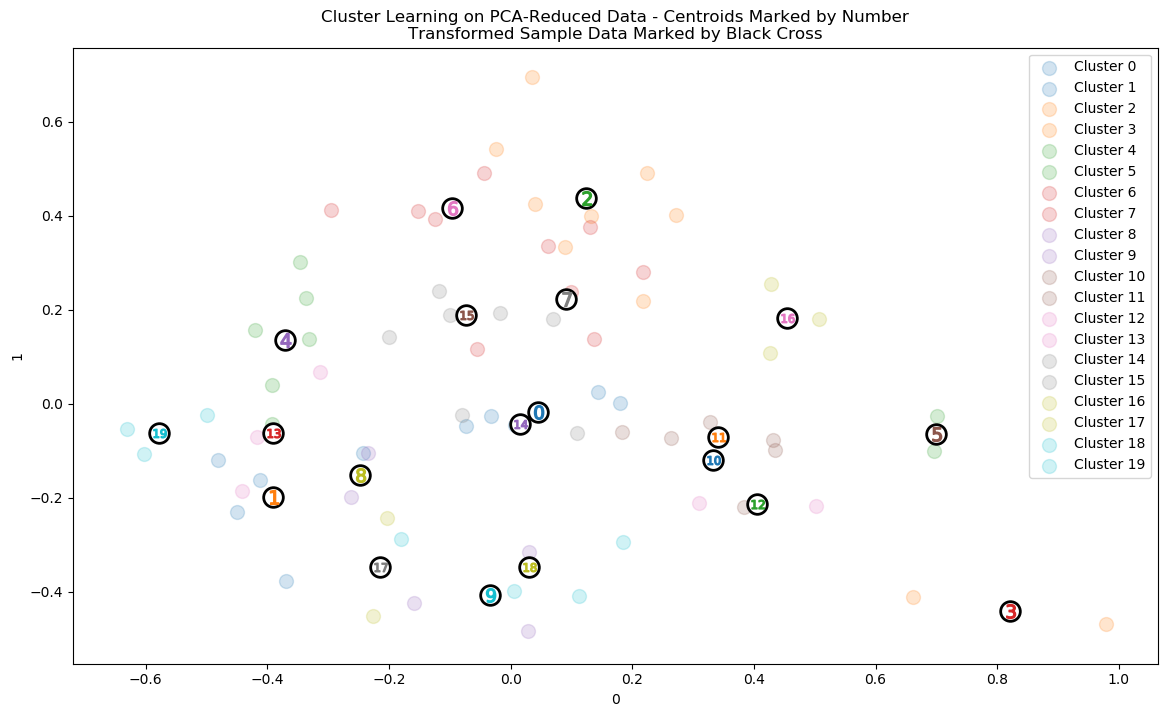

In [751]:
for K in range(4,15):

    clusterer = KMeans(n_clusters=K).fit(class_means)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(class_means)
    centers = clusterer.cluster_centers_

    # cluster_results(class_means, preds, centers)


    nclass = np.zeros((len(vals[root_name]),))

    for i in class_means.index.values:
        loc = class_ind[i]
        nclass[loc] = preds[i]

    create_shapefile_from_shapely_multi(islands,
                                output_dir_GIS + root_name + '_' + str(K) + '.shp',
                                fields = {'kmeans': nclass},
                                field_type = {'kmeans': 2})

In [757]:
files = ['ganges_metrics/metrics_geosom/geoSom_PCA2/9x9/classes_9x9.shp', 
         'ganges_metrics/metrics_geosom/geoSom_PCA2/8x8/classes_8x8.shp',
 'ganges_metrics/metrics_geosom/geoSom_PCA2/11x11/classes_11x11.shp',
 'ganges_metrics/metrics_geosom/geoSom_PCA2/10x10/classes_10x10.shp']

['ganges_metrics/metrics_geosom/geoSom_PCA2/6x6/classes_6x6.shp',
 'ganges_metrics/metrics_geosom/geoSom_PCA2/8x8/classes_8x8.shp',
 'ganges_metrics/metrics_geosom/geoSom_PCA2/11x11/classes_11x11.shp',
 'ganges_metrics/metrics_geosom/geoSom_PCA2/5x5/classes_5x5.shp',
 'ganges_metrics/metrics_geosom/geoSom_PCA2/10x10/classes_10x10.shp',
 'ganges_metrics/metrics_geosom/geoSom_PCA2/9x9/classes_9x9.shp',
 'ganges_metrics/metrics_geosom/geoSom_PCA2/7x7/classes_7x7.shp']

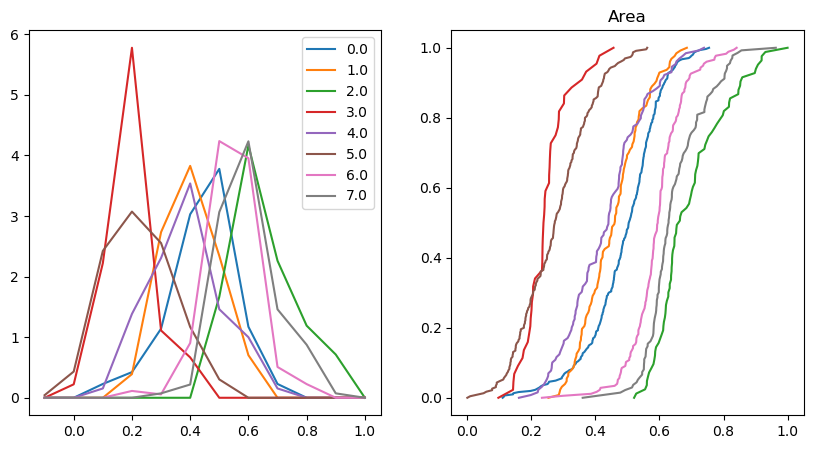

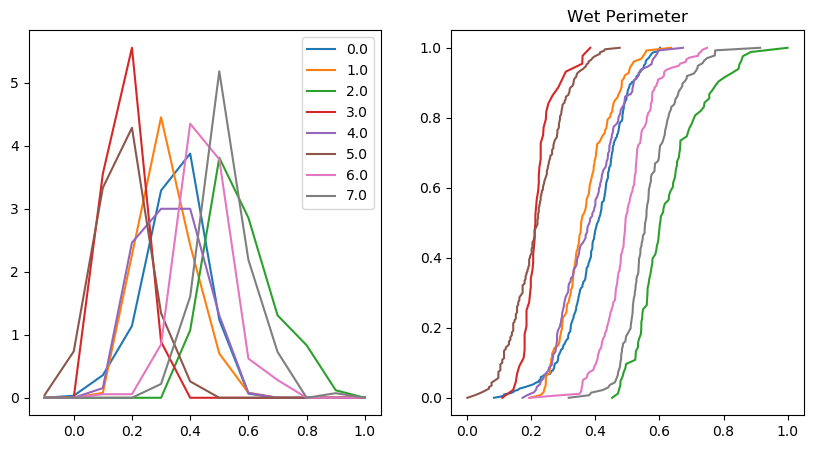

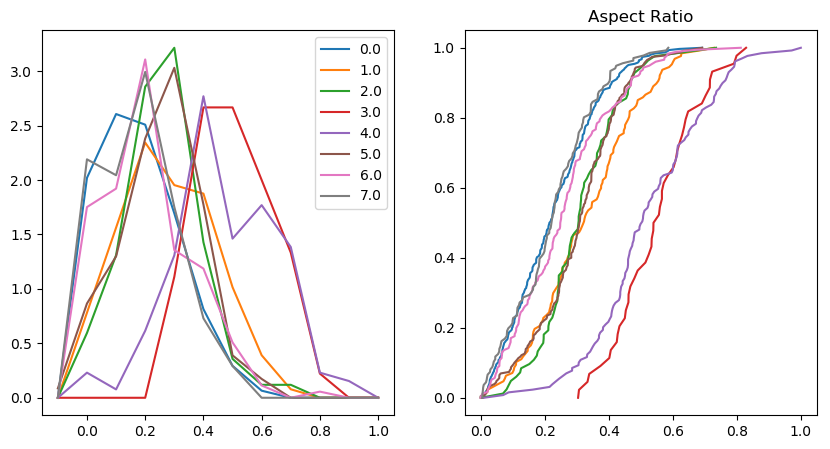

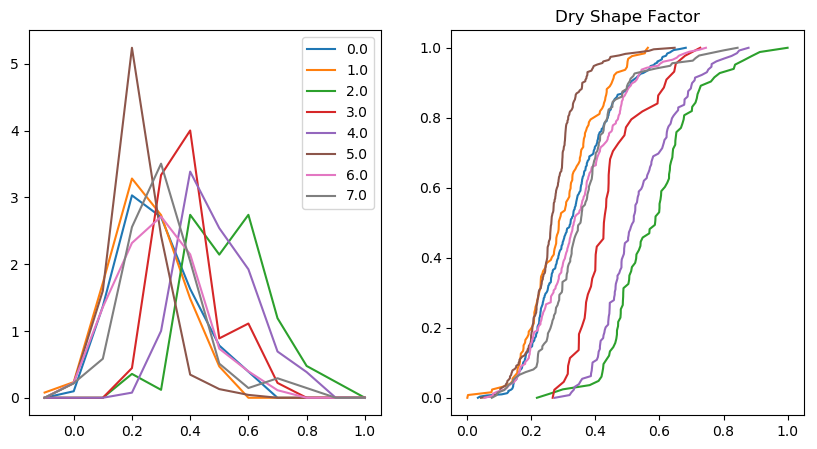

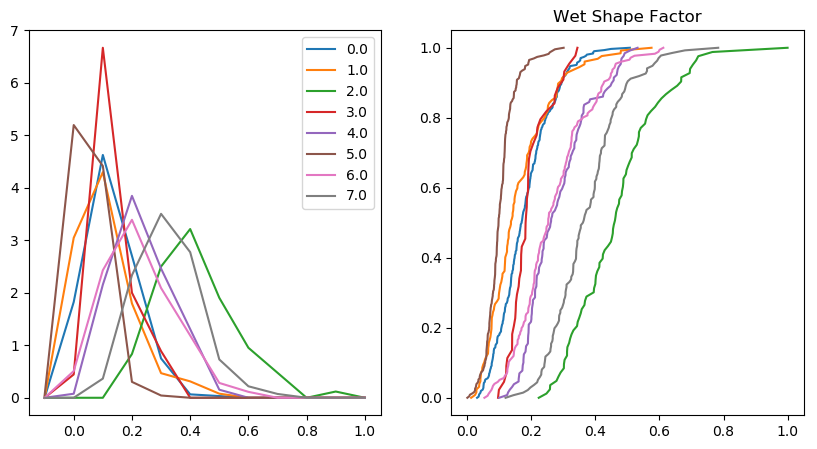

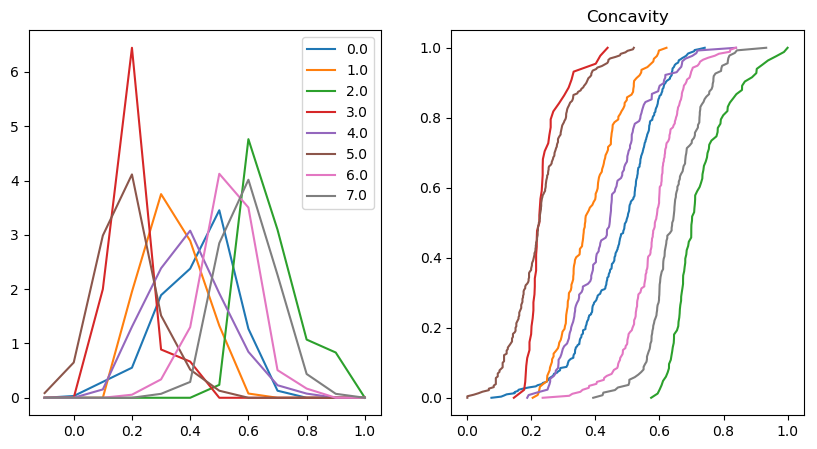

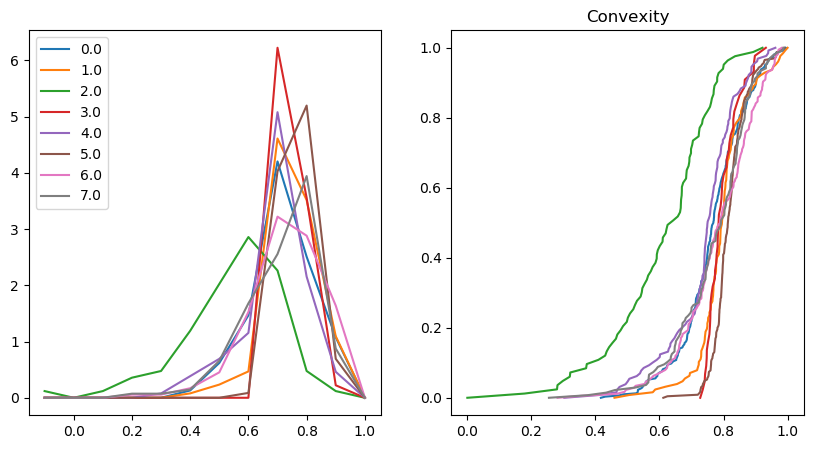

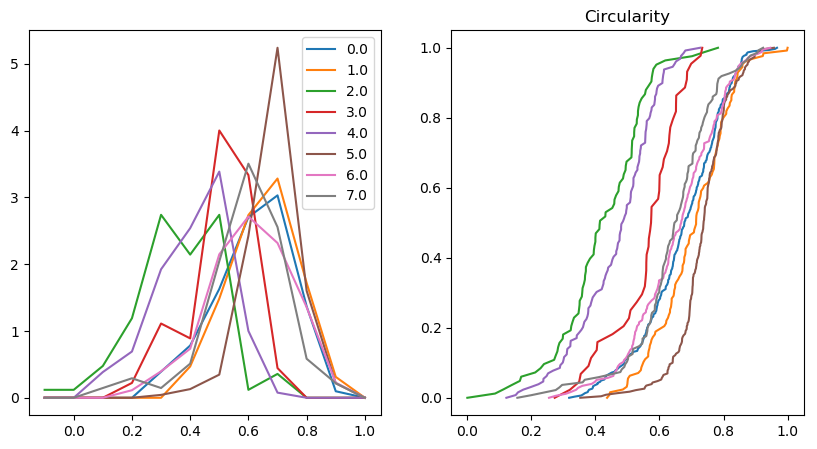

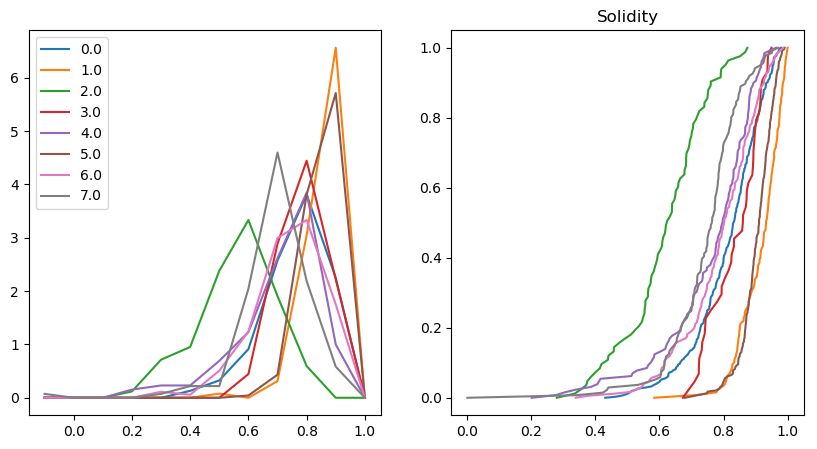

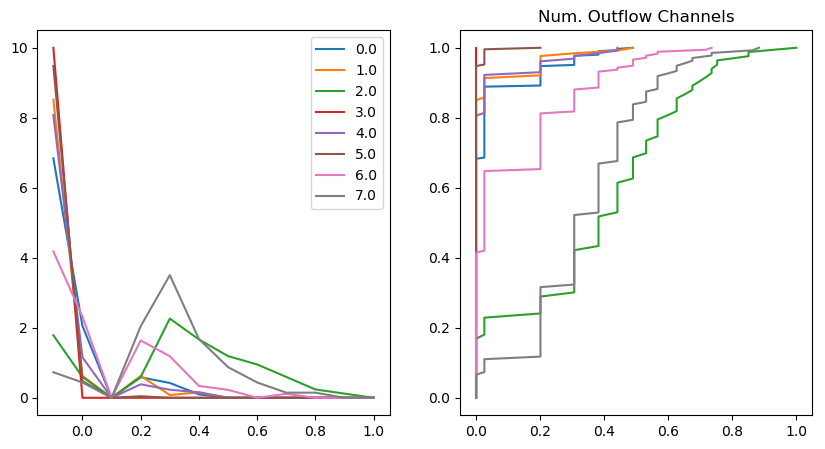

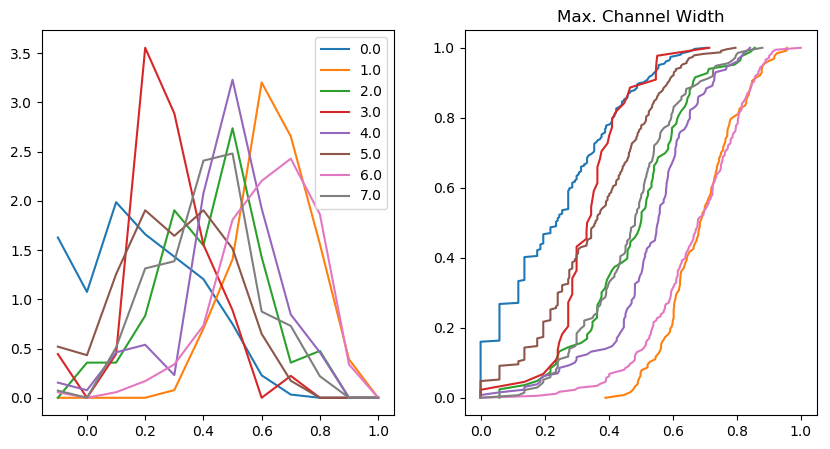

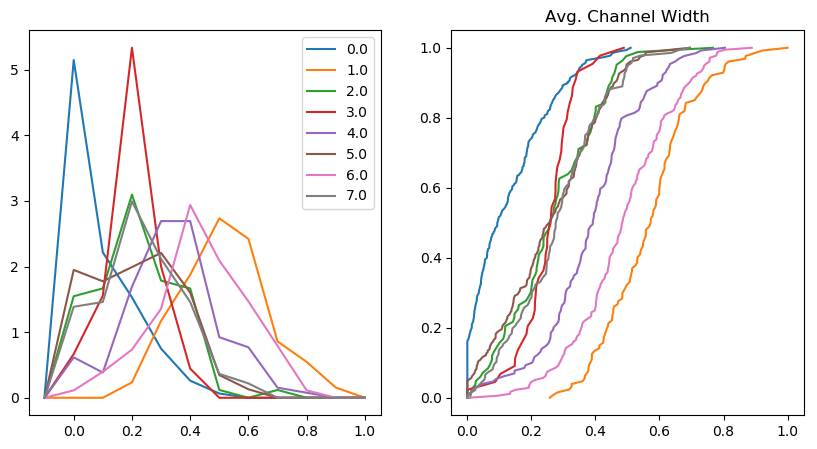

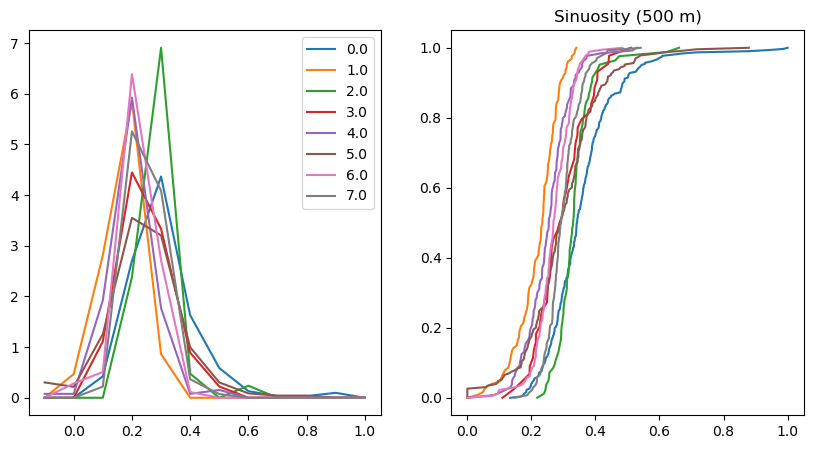

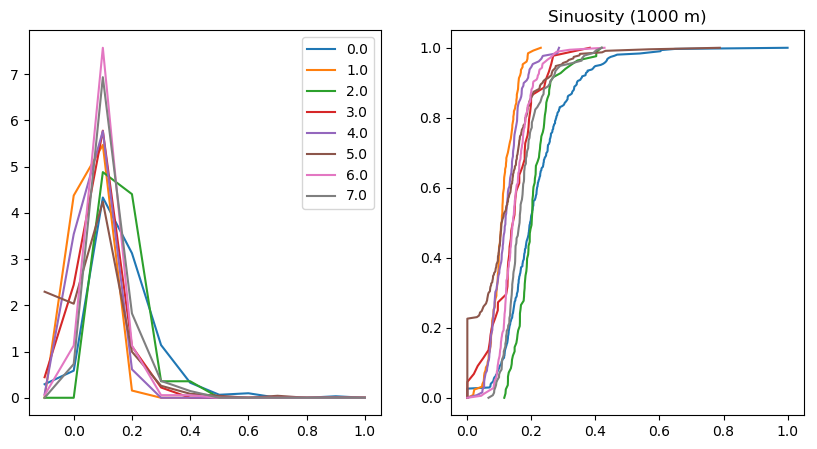

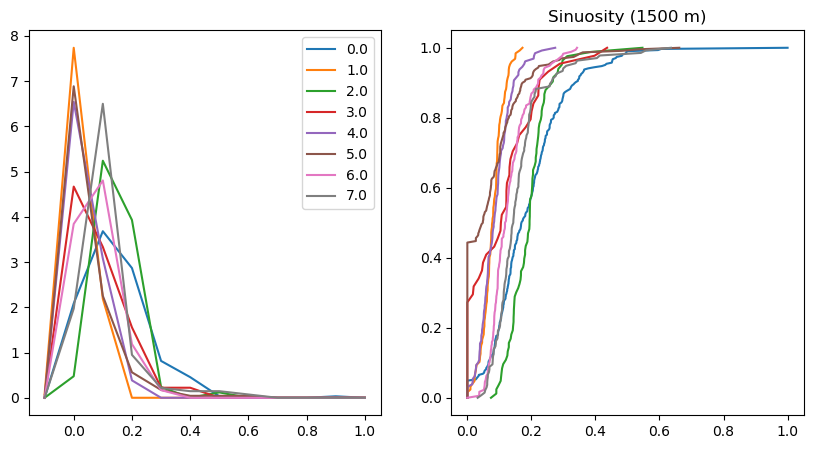

In [830]:
for k in classify_data2.columns.values:
    fig = plt.figure(figsize = (10,5))
    ax1 = fig.add_subplot(121)
    for n in np.unique(nclass):
        values, bins = np.histogram(classify_data2[nclass == n][k].values, range = (-0.1,1.1), bins = 12, normed = True)
        ax1.plot(bins[:-1], values, label = str(n))
    
    ax2 = fig.add_subplot(122)
    for n in np.unique(nclass):
        data = classify_data2[nclass == n][k].values
        # sort the data:
        data_sorted = np.sort(data)

        # calculate the proportional values of samples
        p = 1. * np.arange(len(data)) / (len(data) - 1)
        
        ax2.plot(data_sorted, p, label = str(n))
        
    ax1.legend()
    plt.title(k)
    plt.savefig(output_dir + 'histograms/n' + str(k) + '.png')

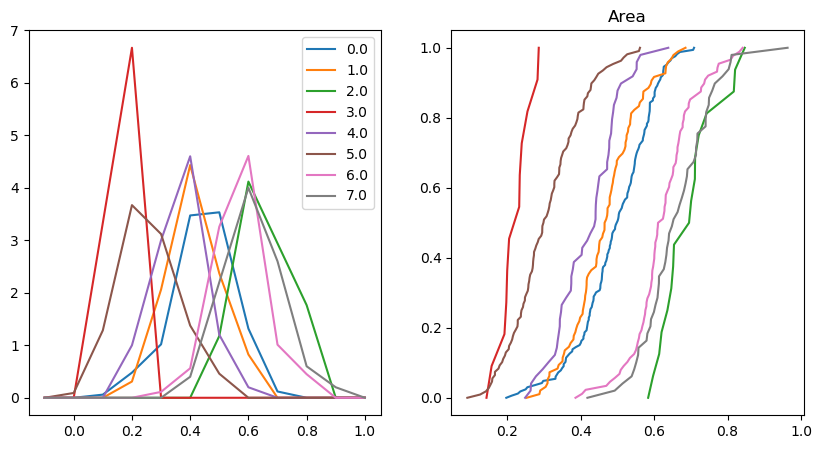

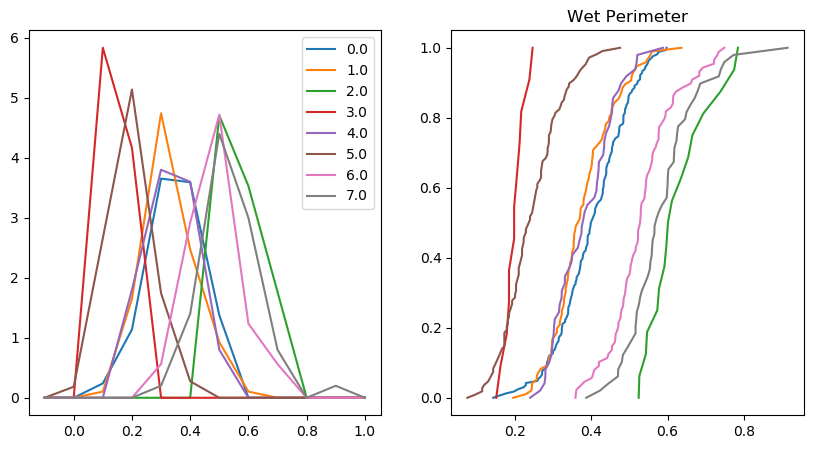

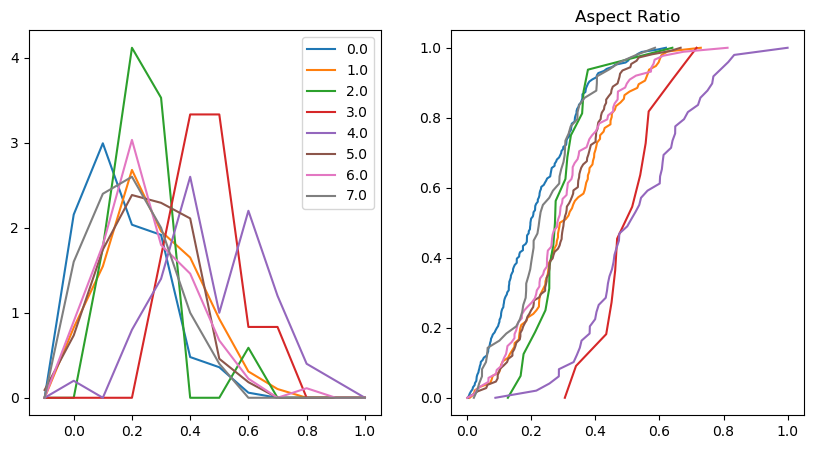

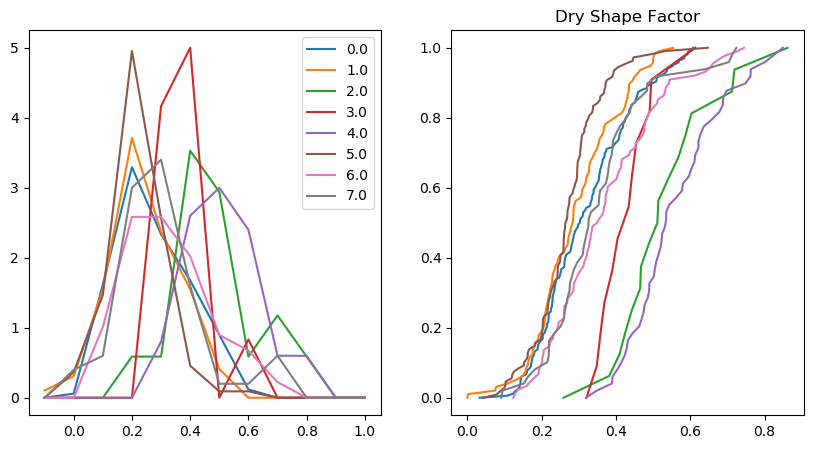

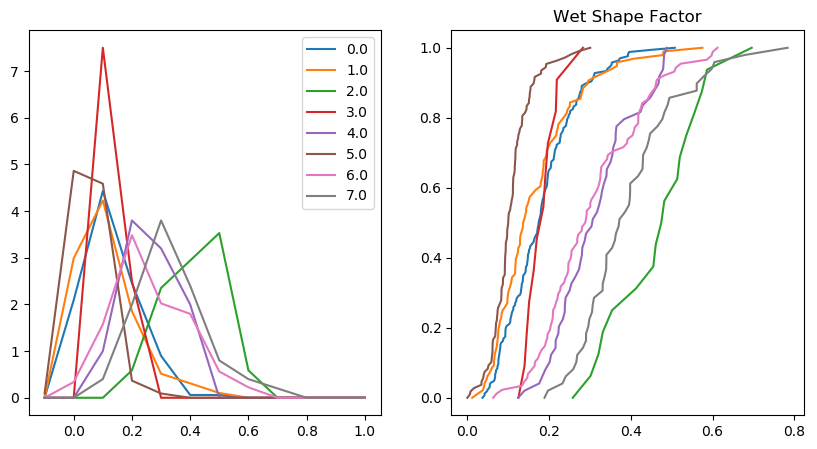

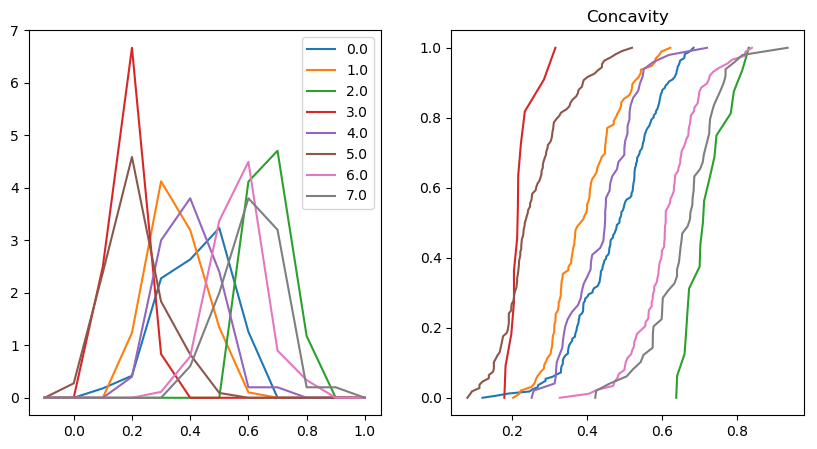

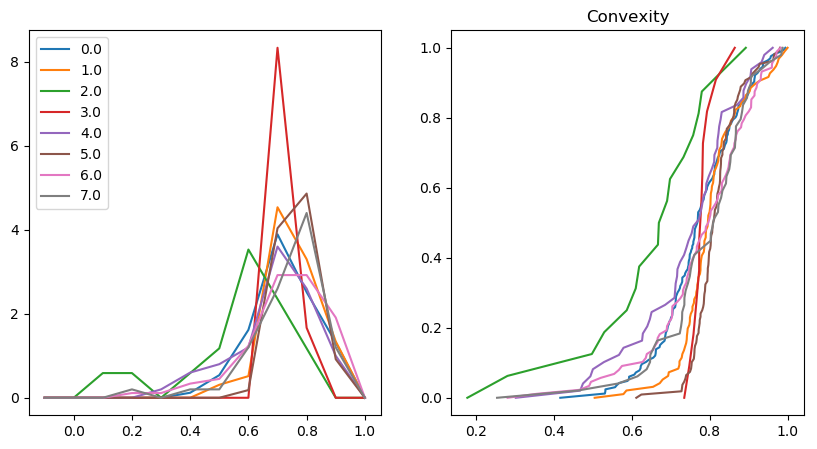

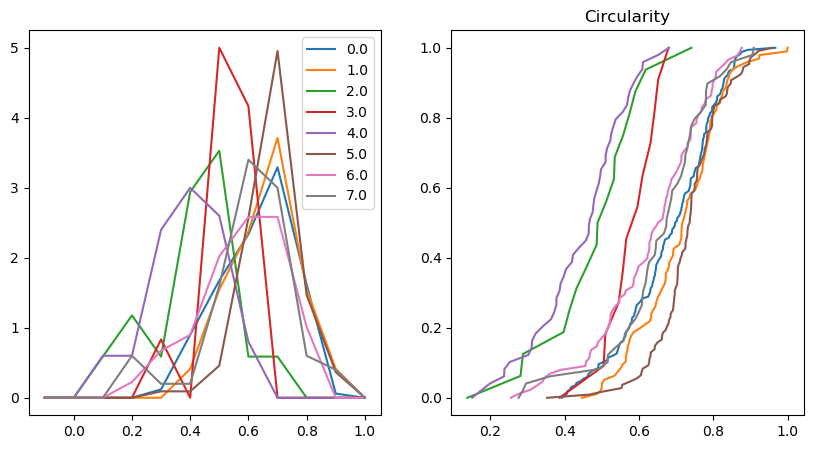

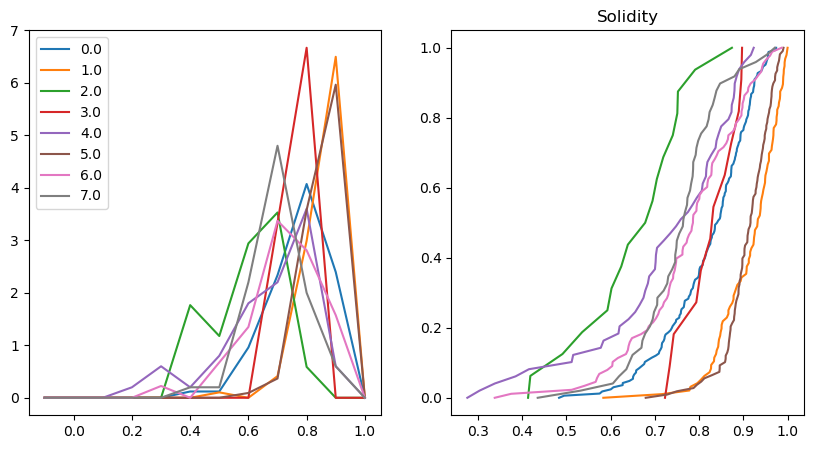

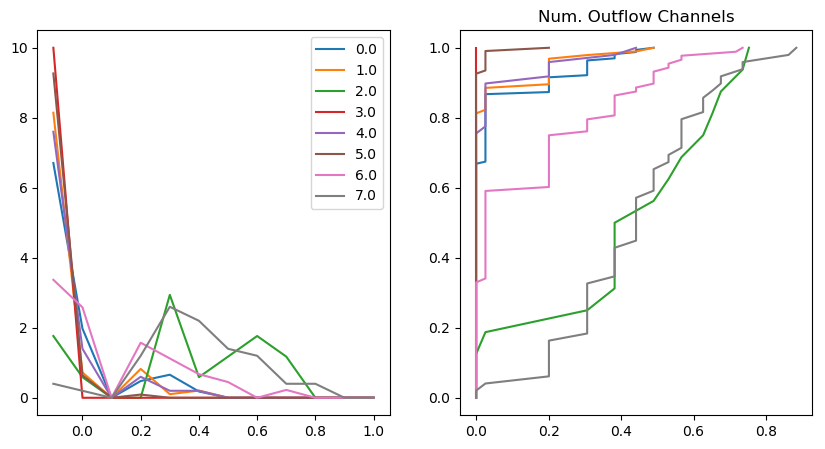

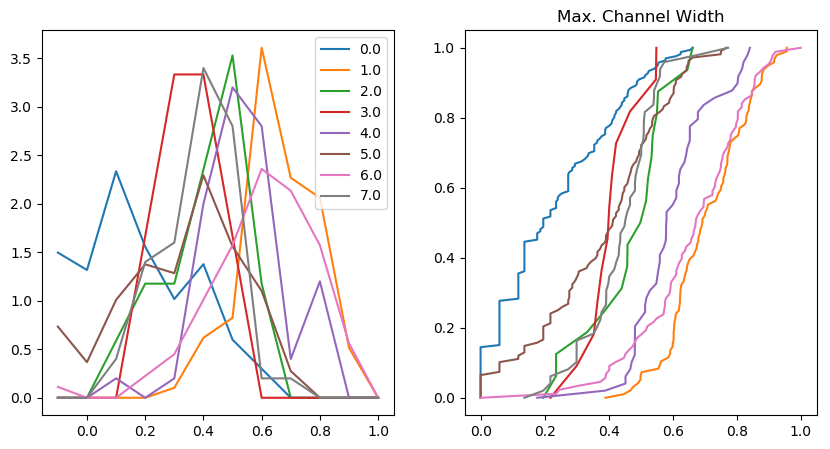

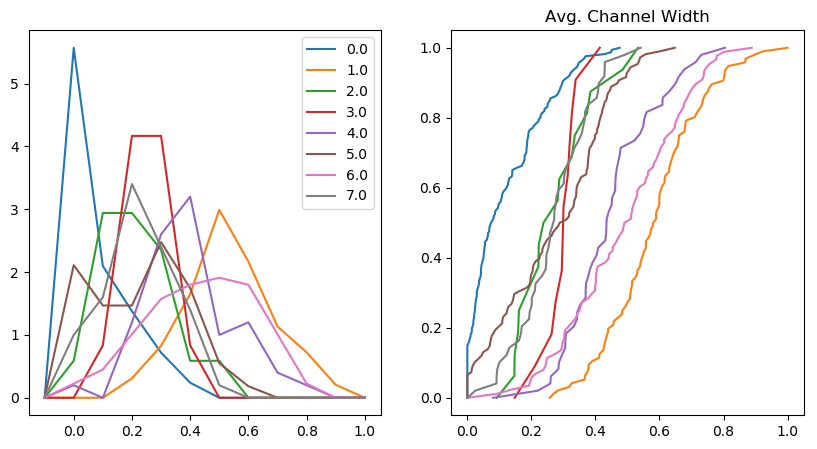

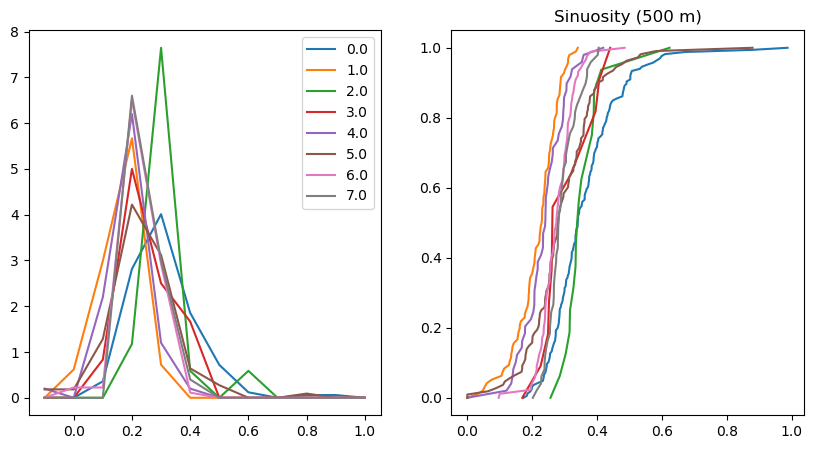

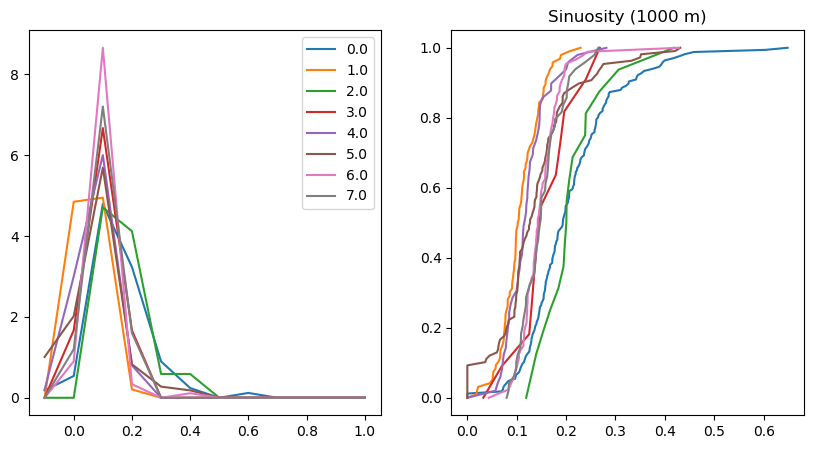

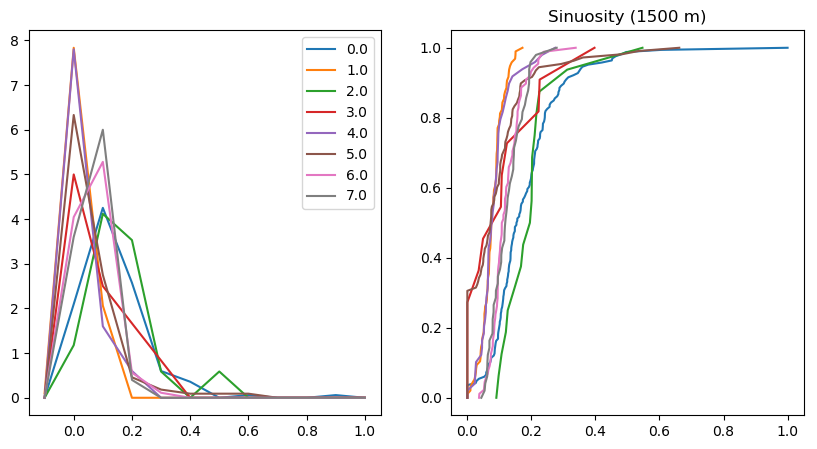

In [839]:
for k in classify_data2.columns.values:
    fig = plt.figure(figsize = (10,5))
    ax1 = fig.add_subplot(121)
    for n in np.unique(nclass):
        values, bins = np.histogram(classify_data2[(nclass == n) & (zones == 1)][k].values, range = (-0.1,1.1), bins = 12, normed = True)
        ax1.plot(bins[:-1], values, label = str(n))
    
    ax2 = fig.add_subplot(122)
    for n in np.unique(nclass):
        data = classify_data2[(nclass == n) & (zones == 1)][k].values
        # sort the data:
        data_sorted = np.sort(data)

        # calculate the proportional values of samples
        p = 1. * np.arange(len(data)) / (len(data) - 1)
        
        ax2.plot(data_sorted, p, label = str(n))
        
    ax1.legend()
    plt.title(k)
    plt.savefig(output_dir + 'histograms/zone3_' + str(k) + '.png')

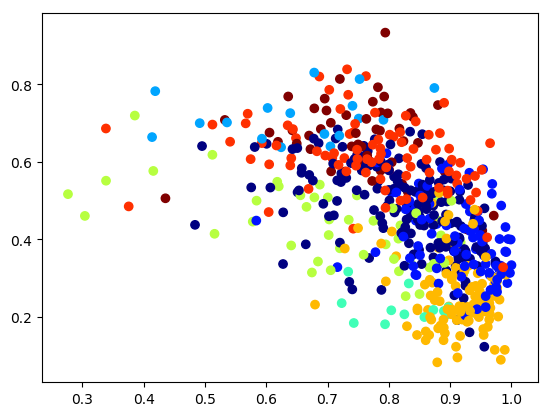

In [849]:
plt.scatter(classify_data2[zones == 1]['Solidity'].values, classify_data2[zones == 1]['Concavity'].values, c = nclass[zones == 1], cmap = 'jet')

In [891]:
from scipy.spatial.distance import pdist

dist_all = pdist(classify_data2.values)
dist_all_mean = np.mean(dist_all)
hist_vals_all,_ = np.histogram(dist_all, range=(0,2), bins = 160)



columns = classify_data2.columns.values

missing_col = []
hist_vals = []
dist_mean = []

for cols in itertools.combinations(columns, len(columns)-1):
    
    missing_col.append([c for c in columns if c not in cols][0])
    dist = pdist(classify_data2[list(cols)].values)
    
    values, bins = np.histogram(dist, range=(0,2), bins = 160)
    hist_vals.append(values)
    
    dist_mean.append(np.mean(dist))

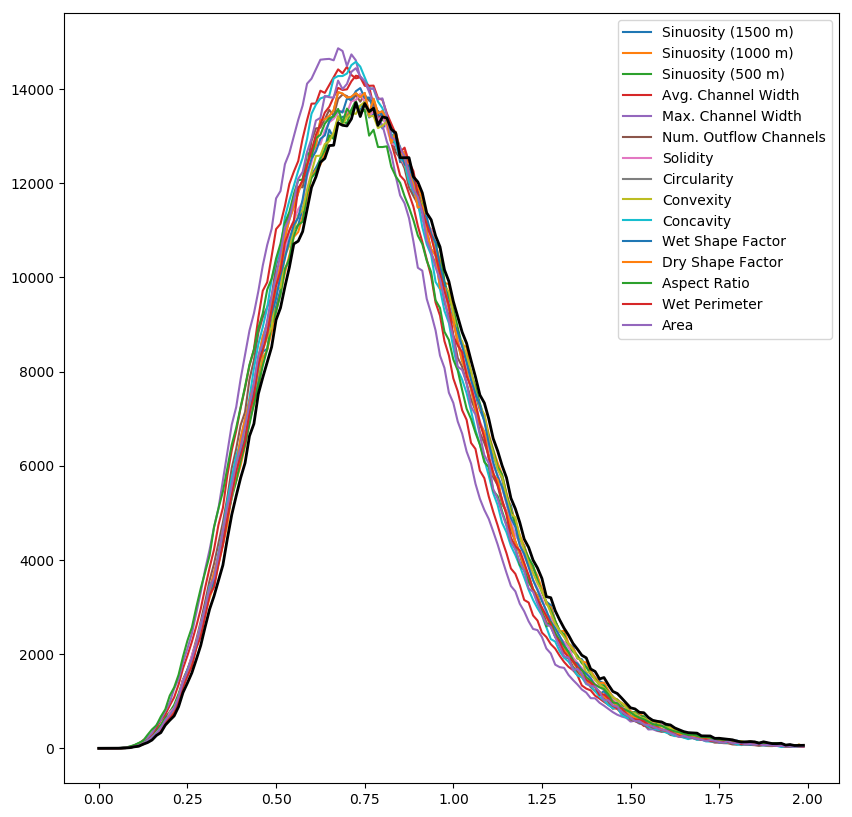

In [892]:
plt.figure(figsize=(10,10))
for c in range(len(missing_col)):
    plt.plot(bins[:-1], hist_vals[c], label = missing_col[c])
    
plt.legend()
# plt.ylim(50000,60000)
# plt.xlim(0.5,1)

plt.plot(bins[:-1], hist_vals_all, 'k-', lw = 2)

In [1018]:
files = ['ganges_metrics/metrics_geosom/PCA_shp2/9x9_14.shp']
vals = {}

ids = [252,624,720,808,1027]
colors = ['0.2','purple','b','g','r']

for fname in files:
    
    print fname
    root_name = fname.split('/')[-1].split('_')[-2].split('.')[0]
    
    sf = shapefile.Reader(fname)
    
    vals[root_name] = np.array([int(r.record[-1]) for r in sf.shapeRecords()])
    
    cat = vals[root_name][ids]

ganges_metrics/metrics_geosom/PCA_shp2/9x9_14.shp


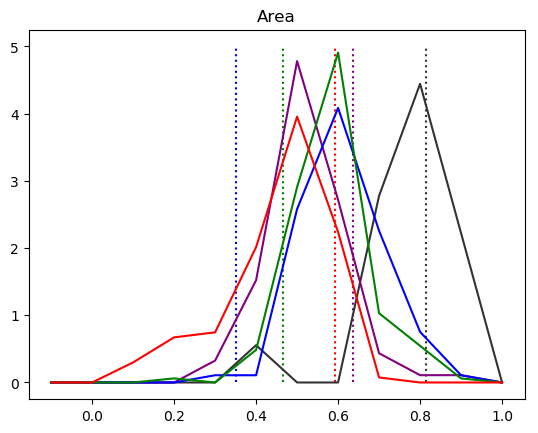

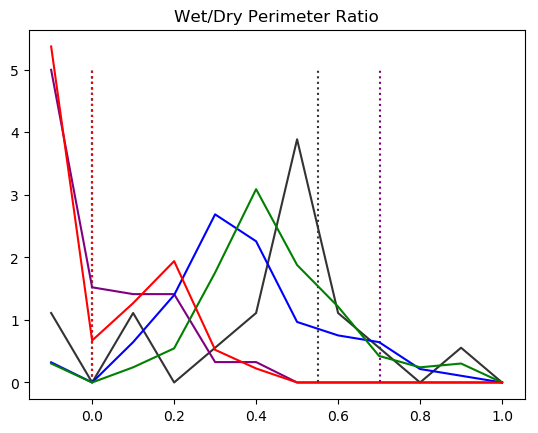

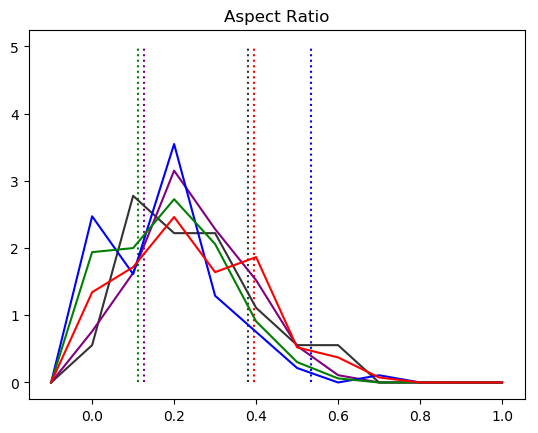

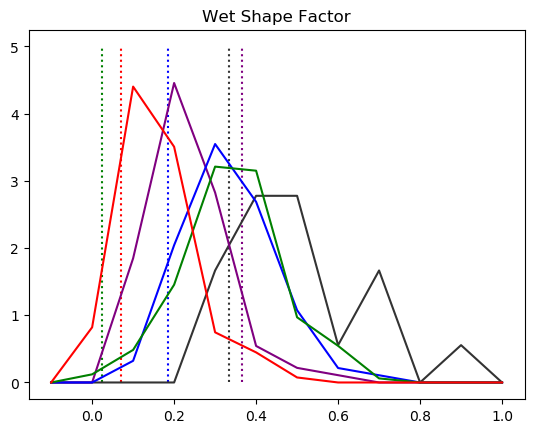

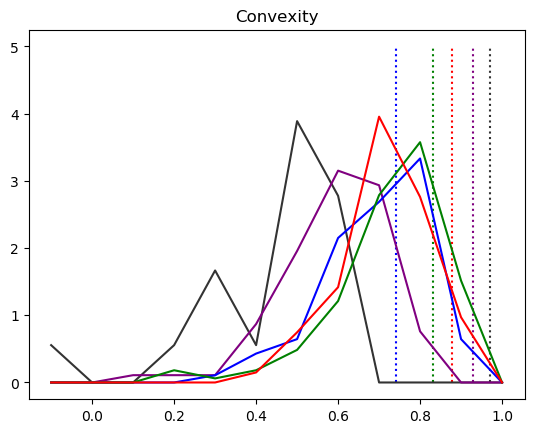

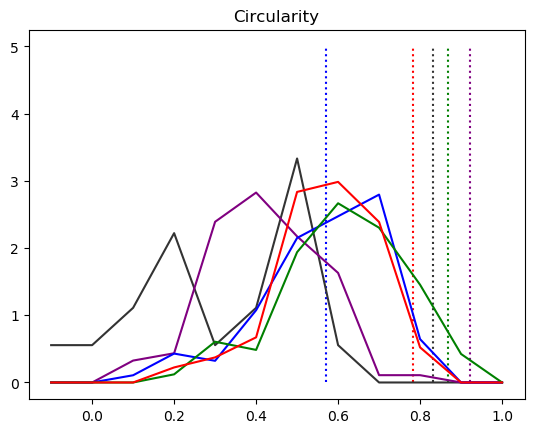

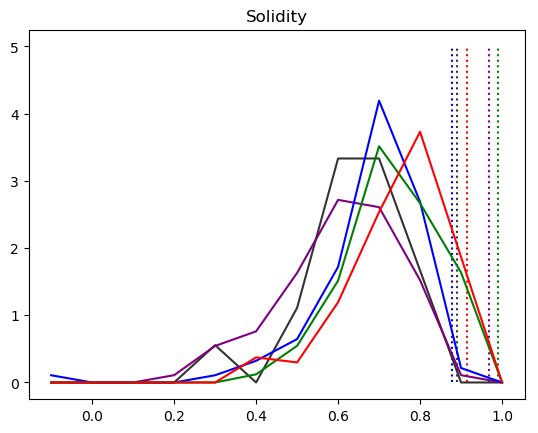

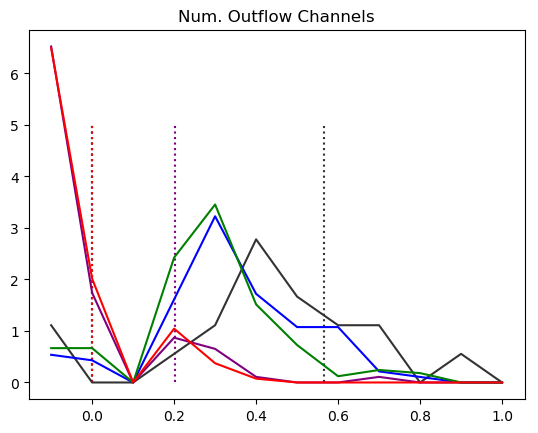

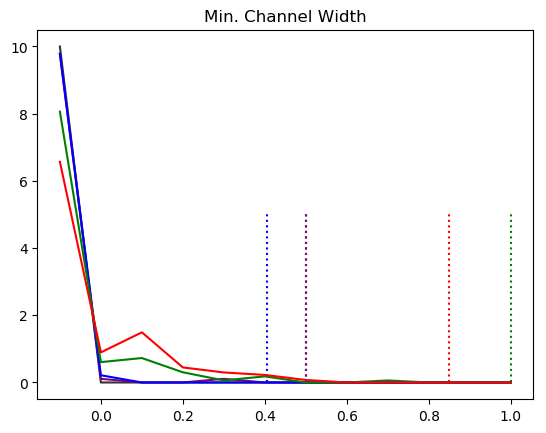

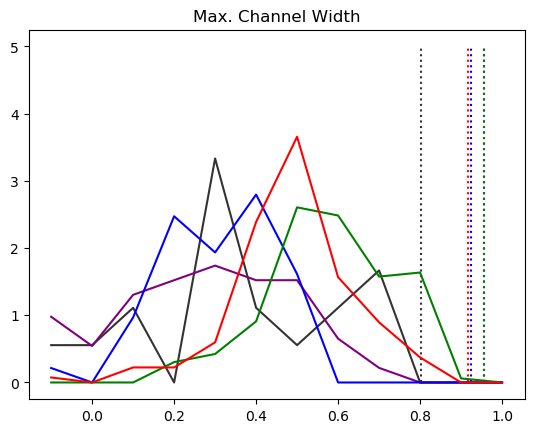

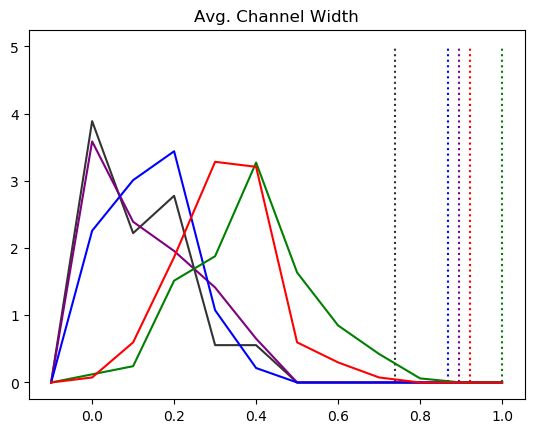

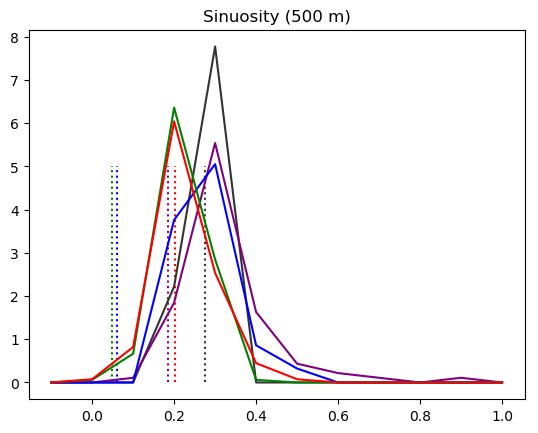

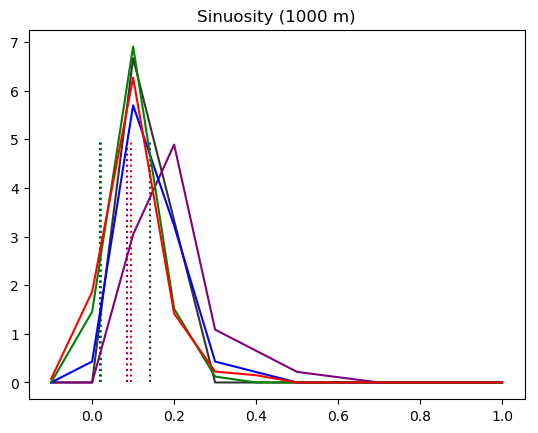

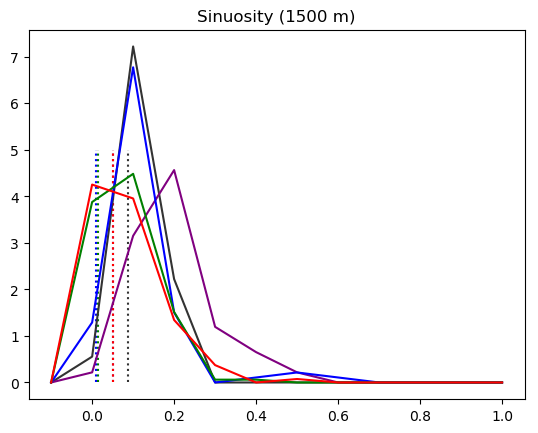

In [1019]:
for k in classify_data2.columns.values:
    
    plt.figure()
    
    for n,c in enumerate(cat):
    
        values, bins = np.histogram(classify_data2[vals[root_name] == c][k].values, range = (-0.1,1.1), bins = 12, normed = True)
        plt.plot(bins[:-1], values, label = inds[n],c = colors[n])
        plt.vlines(classify_data2.loc[inds[n]][k],0,5, colors = colors[n], linestyles = ':')
        plt.title(k)

In [1017]:
cat

array([ 0,  7,  2,  2, 12])